==================================================================================================================================
# <div align="center">PROJECT 03: Etsy Print-On-Demand Trends</div>
==================================================================================================================================

### 📝 BUSINESS IDEA

**Print-On-Demand (POD) Business** – What the project is about

### ⚠️ PROBLEM

No Free API exists to access the market data needed, requiring web scraping to gather insights – The challenge we’re addressing

### 🔰 SOLUTION FRAMEWORK

Web scrape etsy for a specific POD product

Collect the data necessary to clean & analyze


| **Development**                                                                                                                                             | **Presentation**                 |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------- |
| **Business Idea** → **Problem Definition** → **Data Research & Visualization** → **Insights** → **Interpretation** → **Implications** → **Business Impact** | **Limitations & Considerations** |


---

### 📓 SECTION OVERVIEW

- **Project / Business Idea:** What the project is about

- **Problem:** The challenge we’re addressing

- **Solution / Approach:** How we solve it

- **Research & Plots:** How we analyzed data visually

- **Insights:** What we discovered

- **Interpretation:** Why it matters

- **Implications:** What actions the business can take

- **Business Impact:** Expected results for the business

- **Limitations:** What constraints or gaps exist

==================================================================================================================================
# <div align="center">RESEARCH</div>
==================================================================================================================================

### 🌐 **Which Are the Best-Selling POD Products on Etsy?**

I’m researching print-on-demand products to sell on Etsy that only require **digital artwork and marketing**, while the POD provider handles **printing, packaging, and shipping**.


### ⭐ **Using Google Trends for POD Product Research**
💡 **Goal:** Identify which POD product category has been searched the most on Google over the past 5 years (2020–2025).

Below is the list of product categories I’m comparing:

### 🎯 **Chosen POD product to research is :** `tote bags`

| Category              | Subcategories / Examples                                      |
|-----------------------|---------------------------------------------------------------|
| **Custom Apparel**        | T-shirts, Hoodies, Sweatshirts, Tank tops                     |
| **Mug**                   | Ceramic mugs, Color-changing mugs, Espresso mugs, Travel mugs |
| **Tote Bag**              | Cotton totes, All-over print totes                            |
| **Phone Case**            | iPhone / Samsung cases, Tough / Slim cases                    |
| **Stickers**              | Die-cut stickers, Kiss-cut stickers, Sticker sheets           |
| **Hats**                  | Baseball caps, Trucker hats, Beanies                          |
| **Pillows / Cushions**    | Pillow covers, Stuffed pillows, All-over print pillow designs|
| **Blanket**               | Fleece blankets, Sherpa blankets, Woven blankets             |
| **Wall Art**              | Posters, Canvas prints, Framed posters, Metal prints         |
| **Doormat**               | Printed coir doormats, Rubber-backed doormats                |
| **Drinkware**             | Stainless steel tumblers, Water bottles, Wine tumblers       |
| **Calendar**              | Custom printed wall calendars                                 |
| **Yoga Mat**              | Printed yoga mats                                             |
| **Bedding**               | Duvet covers, Pillowcases, All-over print bed sets           |
| **Pet Accessories**       | Pet bandanas, Pet beds, Pet bowls, Pet blankets              |
| **Ornaments**             | Ceramic ornaments, Wood ornaments, Metal ornaments           |


### **BEFORE GETTING STARTED :**

```Etsy``` is a dynamic website, so scraping it requires careful handling.

Since ```Etsy``` uses ```JavaScript``` to load some content,

```requests``` +  ``BeautifulSoup`` might work for static parts (like search results), 

but for dynamic content, ``Selenium`` is more reliable. 

I will be using ``requests`` + ``BeautifulSoup`` for ```product listings``` **(title, price, link)**

Important Note: Etsy uses dynamic loading + anti-bot protections.

Using code with standard HTML scraping can work as long as Etsy doesn’t block the request.

If blocked, using headers, rotating proxies, or the Etsy API will be required.

==================================================================================================================================
# <div align="center">WEB SCRAPING</div>
==================================================================================================================================

### 🧐 QUESTIONS

- Which keywords in product titles and descriptions drive the most sales?

- What keywords improve search visibility on Etsy?

- Which product niches have the highest demand?

- When is the best period to sell based on review trends?

- Which price ranges generate the most sales?

- Which country's customers are buying the most of this product?

----

### 🧰 **Install for web scraping**

In [ ]:
# install requests & beautifulsoup
!pip install requests beautifulsoup4 fake-useragent pandas

# install selenium
!pip install selenium pandas

---

### 📌 **Avoid web BLOCKED**
| Version                                   | Best For          | Pros                                           | Cons                          |
| ----------------------------------------- | ----------------- | ---------------------------------------------- | ----------------------------- |
| **Requests + BeautifulSoup + Pagination** | Simple scraping   | Fast, clean                                    | Etsy may block request        |
| **Selenium + BeautifulSoup + Pagination** | Reliable scraping | Bypasses bot protection, loads dynamic content | Slower, requires ChromeDriver |


---

## 📌 **Product PAGE**

### ⭐ **Etsy Product Info**

The main data fields to extract from Etsy's product page :


| Field Name             | Python Data Type       | Concise Definition                      | Long Definition                                                                                       |
|------------------------|-----------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------|
| **product_title**          | `str`                 | Product title                           | The full name of the product, same across all variants.                                              |
| **product_url**           | `str`                 | Short URL to product listing        | Etsy listing URL in the format `https://www.etsy.com/listing/product_id/` (e.g., "https://www.etsy.com/listing/1289965137/"). |
| **product_id**             | `str`                 | Unique product ID                       | Extracted from `product_url`; a unique identifier assigned by Etsy for each listing.               |
| **product_txt**             | `str`                 | Unique product TEXT                    | Extracted after loading the page using the `product_url`; a unique text identifier assigned by Etsy for each listing that only shows once product listing is selected.               |
| **var_extension**          | `str`                 | Variations(s) URL extension             | The variation(s) extension added to `product_url` to generate `var_url`.                        |
| **var_url**               | `str`                 | Full URL to a variant product                      | Complete link to a specific variant, formed by appending `var_extension` to `product_url`.          |
| **product_options**        | `List[dict]`          | Available product options / eg variation0               | List of all product options (size, color, material, etc.), each stored as a dictionary.             |
| **product_var**            | `dict`                | Variant’s selected options              | Dictionary representing the specific option(s) chosen for this variant.                              |
| **var_current_price**      | `float` or `Decimal`  | Current price for variant               | Price of this variant after applying any discounts.                                                  |
| **var_old_price**          | `float` or `Decimal`  | Original price for variant              | Price of this variant before any discounts were applied (if available).                              |
| **var_discount_percentage**| `float`               | Variant discount percentage             | Discount applied to this variant, calculated if both current and old prices are available.           |
| **product_rating**         | `float`               | Average product rating                  | Average rating of the product out of 5 (e.g., 4.5).                                                 |
| **txt_reviews**            | `str`                 | Concatenated review text                | All review texts or summary text for the product; may include the number of reviews in parentheses. |
| **nbr_reviews**            | `int`                 | Total number of reviews                 | Total count of reviews received by the product.                                                     |
| **listed_date**            | `date`                | Date product was first listed           | The date the product was originally published on Etsy.                                               |
| **product_description**            | `str`                | Product's description           | The text content of the description of the product.                                               |



variation0=5886526755

variation0=5886526755 & variation1=5886526755


https://www.etsy.com/listing/1716154949/boho-embroidered-floral-tote-bag-in-sage

https://www.etsy.com/listing/product_id/product_txt/product_var


product_var  ?variation0=&variation1=variation2=

---

### ⭐ **Insighted Data `product_niche` from `product_title` and `product_description`**

| Field Name                 | Python Data Type       | Concise Definition                               |
|---------------------------|-------------------------|---------------------------------------------------|
| **product_niche**             | `str`                     | Product theme or genre (comedy, anime…) based on `product_title` & `product_description`.         |

---

### ⭐ **Etsy Product Reviews (Extra dataset)**

All of the product Reviews `Comment`, `Rating`, and `Date` when each review was posted

| Field Name               | Python Data Type | Concise Definition                                      |
|--------------------------|------------------|----------------------------------------------------------|
| **review_product_var**   | `str`            | The specific product variant purchased by the reviewer   |
| **review_rating**        | `float`          | The rating the customer gave the product                 |
| **review_comment**       | `str`            | The text comment the customer wrote                      |
| **review_date**          | `date`           | The date when the customer posted the review             |
| **review_profile_url**   | `str`            | URL to the reviewer's profile page                       |
| **review_username**      | `str`            | The username of the reviewer extracted from review_profile_url |
| **review_country**       | `str`            | The reviewer's country/location                          |



---

# 📌 **CODE**

### STEP 7 - COMBINE ALL CSV FILES

In [42]:
import pandas as pd

# Load all 3 CSVs (part1, part2, part3)
df1 = pd.read_csv("../data/interim/etsy_dataset_part1_from_1.csv")
df2 = pd.read_csv("../data/interim/etsy_dataset_part2_from_381.csv")
df3 = pd.read_csv("../data/interim/etsy_dataset_part2_from_411_to_910.csv")
df4 = pd.read_csv("../data/interim/etsy_dataset_part3_from_581.csv")
df5 = pd.read_csv("../data/interim/etsy_dataset_part4_from_911.csv")
df6 = pd.read_csv("../data/interim/etsy_dataset_part4_from_1223.csv")
# Combine and remove duplicates by product_id
combined = pd.concat([df1, df2, df3,df4,df5,df6]).drop_duplicates(subset='product_id', keep='first').reset_index(drop=True)

# Save final combined dataset
combined.to_csv("../data/interim/etsy_pod_listings.csv", index=False)
print(f"Combined: {len(df1)} + {len(df2)} + {len(df3)} + {len(df4)} + {len(df5)} + {len(df6)} = {len(combined)} unique products")
combined.shape
# TOTAL PRODUCTS DATASET 1279

Combined: 381 + 200 + 500 + 4 + 313 + 330 = 1279 unique products


(1279, 8)

### STEP 6 - PART 6 - FROM 1223

In [40]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 1222 (start at 1223)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=1222,
                                     new_to_collect=778,  # 2000 - 1222 = 778
                                     output_csv_path="../data/interim/etsy_dataset_part4_from_1223.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect  # want to reach index 2000

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    # Combined file with everything you already have (1–1222)
    existing_csv = "../data/interim/Samia_dataset.csv"

    already_have = 1222          # last existing index
    to_collect_now = 778         # to reach 2000 total

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,          # start at 1223
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part4_from_1223.csv"
    )
    print(df_new.head())


Loaded 911 existing product_ids from ../data/interim/Samia_dataset.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #1223: Sac en toile de jute nom floral pour cadeau de proposition d
Collected #1224: Cabas personnalisé avec initiales brodées, sac fourre-tout p
Collected #1225: Sac fourre-tout chat mignon, sac en toile minimaliste, cadea
Collected #1226: Sac fourre-tout personnalisé en velours côtelé brodé - Cadea
Collected #1227: Sac fourre-tout vintage pressé fleurs sauvages : cadeau flor
Collected #1228: Sac cadeau personnalisé de demoiselle d'honneur, sac fourre-
Collected #1229: Sac fourre-tout personnalisé, sac fourre-tout avec nom, sac 
Collected #1230: Sac fourre-tout idiot, Got Too Silly, sac d'oie, fourre-tout
Collected #1231: Sac fourre-tout avec nom personnalisé, Cabas personnalisé en
Collected #1232: vintage multi-poches en velours côtelé à bandoulière et nom 
Collected #1233: Sac fourre-tout coloré en forme de chat,

### STEP 05 - PART 5 - UP TO 2000 PRODUCTS

In [36]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse


# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 910 (start at 911)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=910,
                                     new_to_collect=1090,  # 911..2000 inclusive
                                     output_csv_path="../data/interim/etsy_dataset_part4_from_911.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect  # want to reach index 2000

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    # This should be your combined file that already contains rows 1–910
    existing_csv = "../data/interim/Samia_dataset.csv"
    already_have = 910
    to_collect_now = 1090  # to reach 2000

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,          # start counting at 911
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part4_from_911.csv"
    )
df_new.head()

Loaded 911 existing product_ids from ../data/interim/Samia_dataset.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #911: Sac en toile de jute nom floral pour cadeau de proposition d
Collected #912: Cabas personnalisé avec initiales brodées, sac fourre-tout p
Collected #913: Sac fourre-tout chat mignon, sac en toile minimaliste, cadea
Collected #914: Sac fourre-tout personnalisé en velours côtelé brodé - Cadea
Collected #915: Joli sac fourre-tout rétro en velours côtelé avec bandoulièr
Collected #916: Sac fourre-tout vintage pressé fleurs sauvages : cadeau flor
Collected #917: Sac fourre-tout personnalisé, sac fourre-tout avec nom, sac 
Collected #918: Sac cadeau personnalisé de demoiselle d'honneur, sac fourre-
Collected #919: Sac fourre-tout coloré en forme de chat, sac à bandoulière f
Collected #920: Sac fourre-tout floral fleurs sauvages - Sac de marché en to
Collected #921: vintage multi-poches en velours côtelé à bandoulièr

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/1793192581/sac...,1793192581,Sac en toile de jute nom floral pour cadeau de...,4.7584,4400,1.51,4.31,65.0
1,https://www.etsy.com/fr/listing/4407721060/cab...,4407721060,"Cabas personnalisé avec initiales brodées, sac...",4.7516,7900,3.80,12.67,70.0
2,https://www.etsy.com/fr/listing/4373362161/sac...,4373362161,"Sac fourre-tout chat mignon, sac en toile mini...",4.7933,209,4.31,8.61,50.0
3,https://www.etsy.com/fr/listing/4409630241/sac...,4409630241,Sac fourre-tout personnalisé en velours côtelé...,4.8338,2800,10.68,21.36,50.0
4,https://www.etsy.com/fr/listing/1482374993/jol...,1482374993,Joli sac fourre-tout rétro en velours côtelé a...,4.9540,6400,21.57,30.81,30.0


### STEP 04 Combined all CSV PARTS to make MAIN_DATASET CSV

In [1]:
import pandas as pd

# Paths
final_path = "../data/interim/etsy_dataset_final.csv"                # old combined file
new_path   = "../data/interim/etsy_dataset_part2_from_411_to_910.csv"  # new batch
out_path   = "../data/raw/main_dataset.csv"                     # requested name

# Load
df_final = pd.read_csv(final_path)
df_new   = pd.read_csv(new_path)

# Combine and drop duplicates by product_id
df_main = pd.concat([df_final, df_new], ignore_index=True)
df_main = df_main.drop_duplicates(subset="product_id", keep="first").reset_index(drop=True)

# Save
df_main.to_csv(out_path, index=False)
print(f"Saved merged file to: {out_path}")
print("Rows:", len(df_main))
df_main.head()

Saved merged file to: ../data/raw/main_dataset.csv
Rows: 911


,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


---

### STEP 03 - PART 4 - Extracted from 411 up to 910/1000 from product listings

In [95]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }

# --------------------------
# Continue scraping after 410 (start at 411)
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=410,
                                     new_to_collect=500,
                                     output_csv_path="../data/interim/etsy_dataset_part2_from_411_to_910.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new

if __name__ == "__main__":
    existing_csv = "../data/interim/etsy_dataset_final.csv"  # contains products 1–410
    already_have = 410
    to_collect_now = 500  # try to get 500 new products (411–910)

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,  # start at 411
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part2_from_411_to_910.csv"
    )
df_new.head()


Loaded 411 existing product_ids from ../data/interim/etsy_dataset_final.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #411: Sac fourre-tout personnalisé, cadeau de demoiselle d'honneur
Collected #412: Sac fourre-tout personnalisé en toile brodée : sac à main or
Loading page 2: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=2
Collected #413: Sac fourre-tout personnalisé | Sac en toile brodé | fourre-t
Collected #414: Sac fourre-tout en toile personnalisé, sac de plage avec nom
Collected #415: Sac-cadeau personnalisé de demoiselle d'honneur avec breloqu
Loading page 3: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=3
Collected #416: Sacs fourre-tout de demoiselle d'honneur avec broderie perso
Collected #417: Sac fourre-tout personnalisé, sac fourre-tout cadeaux de dem
Collected #418: Sac de plage personnalisé pour voyage de filles/sac fourre-t
Collected #419: Sac cabas person

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4306198508/sac...,4306198508,"Sac fourre-tout personnalisé, cadeau de demois...",4.7861,2000,1.04,1.89,45.0
1,https://www.etsy.com/fr/listing/4360248759/sac...,4360248759,Sac fourre-tout personnalisé en toile brodée :...,4.8000,25,14.86,49.53,70.0
2,https://www.etsy.com/fr/listing/4330505869/sac...,4330505869,Sac fourre-tout personnalisé | Sac en toile br...,4.8427,104,7.37,17.54,58.0
3,https://www.etsy.com/fr/listing/4304272673/sac...,4304272673,"Sac fourre-tout en toile personnalisé, sac de ...",4.8201,3200,5.19,8.66,40.0
4,https://www.etsy.com/fr/listing/4301824291/sac...,4301824291,Sac-cadeau personnalisé de demoiselle d'honneu...,4.8708,10800,3.25,6.49,50.0


---

### STEP 03 - COMBINED AND REMOVED DUPLICATES USING PRODUCT ID

In [92]:
import pandas as pd

# Load all 3 CSVs (part1, part2, part3)
df1 = pd.read_csv("../data/interim/etsy_dataset_part1_from_1.csv")
df2 = pd.read_csv("../data/interim/etsy_dataset_part2_from_381.csv")
df3 = pd.read_csv("../data/interim/etsy_dataset_part3_from_581.csv")

# Combine and remove duplicates by product_id
combined = pd.concat([df1, df2, df3]).drop_duplicates(subset='product_id', keep='first').reset_index(drop=True)

# Save final combined dataset
combined.to_csv("../data/interim/etsy_dataset_final.csv", index=False)
print(f"Combined: {len(df1)} + {len(df2)} + {len(df3)} = {len(combined)} unique products")
print(combined.head())


Combined: 381 + 200 + 4 = 411 unique products
                                         product_url  product_id  \
0  https://www.etsy.com/fr/listing/4392351544/sac...  4392351544   
1  https://www.etsy.com/fr/listing/1852832959/sac...  1852832959   
2  https://www.etsy.com/fr/listing/4373938822/sac...  4373938822   
3  https://www.etsy.com/fr/listing/4387299123/sac...  4387299123   
4  https://www.etsy.com/fr/listing/4359920915/sac...  4359920915   

                                       product_title  product_rating  \
0  Sac cabas en velours côtelé personnalisé, sac ...          4.9044   
1  Sac fourre-tout en toile brodée, sac de plage ...          4.7559   
2  Sac fourre-tout minimaliste personnalisé pour ...          4.9880   
3  Sac fourre-tout en coton matelassé : imprimé f...          4.7826   
4  Sac fourre-tout personnalisé en toile de jute|...          4.9002   

   nbr_reviews  current_price  old_price  discount_percentage  
0         3900          10.68      19.42        

In [93]:
combined.shape

(411, 8)

---

### STEP 03 - PART 3 - Extracted from 411 up to 414/500 from product listings
There were duplicates had to revise the dataset

In [85]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse

# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }

# --------------------------
# Continue scraping after 581
# --------------------------
def scrape_next_batch_after_existing(existing_csv_paths,
                                     start_index=581,
                                     new_to_collect=419,
                                     output_csv_path="../data/interim/etsy_dataset_part3_from_581.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    
    # Load all previous CSVs product_ids to avoid duplicates
    for csv_path in existing_csv_paths:
        try:
            df_prev = pd.read_csv(csv_path)
            seen_ids.update(df_prev["product_id"].dropna().astype(str))
            print(f"Loaded {len(df_prev)} product IDs from {csv_path}")
        except Exception as e:
            print(f"Could not load previous CSV {csv_path}: {e}")

    page = 1
    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")

            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new

if __name__ == "__main__":
    previous_csvs = [
        "../data/interim/etsy_dataset.csv",                  # original 381
        "../data/interim/etsy_dataset_part2_from_381.csv",   # part 2
    ]
    already_have = 581
    to_collect_now = 419  # to reach 1000 total

    df_new = scrape_next_batch_after_existing(
        existing_csv_paths=previous_csvs,
        start_index=already_have,
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part3_from_581.csv"
    )
    print(df_new.head())


Could not load previous CSV ../data/interim/etsy_dataset.csv: [Errno 2] No such file or directory: '../data/interim/etsy_dataset.csv'
Loaded 200 product IDs from ../data/interim/etsy_dataset_part2_from_381.csv
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #582: Sac fourre-tout de Noël en velours côtelé avec nom personnal
Loading page 2: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=2
Collected #583: Sacs cadeaux personnalisés de demoiselle d'honneur, sacs en 
Collected #584: Sac fourre-tout personnalisé, cadeau de demoiselle d'honneur
Collected #585: Dieu est tellement plus grand qu'un sac fourre-tout, sac fou
Loading page 3: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=3
No listings found on page 3: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=142.0.7444.176); For d

---

### STEP 03 - PART 2 - Extracted from 381 up to 411/500 from product listings

In [80]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from urllib.parse import urlparse


# --------------------------
# Chrome options + NEW driver
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions (same as before)
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Continue scraping after 381
# --------------------------
def scrape_next_batch_after_existing(existing_csv_path,
                                     start_index=381,
                                     new_to_collect=200,
                                     output_csv_path="../data/interim/etsy_dataset_part2_from_381.csv"):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_new_products = []
    seen_ids = set()
    page = 1

    # Load existing CSV to avoid duplicates
    try:
        df_prev = pd.read_csv(existing_csv_path)
        for pid in df_prev["product_id"].dropna().astype(str):
            seen_ids.add(pid)
        print(f"Loaded {len(seen_ids)} existing product_ids from {existing_csv_path}")
    except Exception as e:
        print(f"Could not load previous CSV (will still work, but may re-scrape some): {e}")

    target_total = start_index + new_to_collect

    while start_index + len(all_new_products) < target_total:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        try:
            driver.get(url)
        except Exception as e:
            print(f"Driver error on page {page}: {e}")
            break

        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "div.v2-listing-card"))
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        new_on_page = 0
        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = str(data.get("product_id"))
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_new_products.append(data)
                new_on_page += 1
                current_index = start_index + len(all_new_products)
                print(f"Collected #{current_index}: {data['product_title'][:60]}")
            if start_index + len(all_new_products) >= target_total:
                break

        if new_on_page == 0:
            print("No new products on this page, likely reached end or blocked.")
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    # Save only the new products for this run
    df_new = pd.DataFrame(all_new_products)
    df_new.to_csv(output_csv_path, index=False)
    print(f"Saved {len(df_new)} new products to {output_csv_path}")

    return df_new


if __name__ == "__main__":
    existing_csv = "../data/interim/etsy_dataset.csv"  # first 381
    already_have = 381
    to_collect_now = 200  # change if you want

    df_new = scrape_next_batch_after_existing(
        existing_csv_path=existing_csv,
        start_index=already_have,
        new_to_collect=to_collect_now,
        output_csv_path="../data/interim/etsy_dataset_part2_from_381.csv"
    )
    print(df_new.head())


Could not load previous CSV (will still work, but may re-scrape some): [Errno 2] No such file or directory: '../data/interim/etsy_dataset.csv'
Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected #382: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected #383: Sacs fourre-tout à logo personnalisés Sacs d'épicerie promot
Collected #384: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected #385: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected #386: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected #387: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected #388: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected #389: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected #390: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected #391: Sac cabas en jute et trousse personnalisées / cadeau maîtres

In [81]:
df.head()

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


---

### STEP 03 - PART 1 - Extracted up to 381/500 from product listings

In [78]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote


# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


# --------------------------
# Extract product data from a listing card
# --------------------------
def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            # e.g. "(60% off)" -> 60
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    # Fallback: compute discount if both prices present and percentage missing
    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Scrape best-selling products from listings pages
# --------------------------
def scrape_best_selling_products_from_listings(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_products = []
    seen_ids = set()
    page = 1

    while len(all_products) < product_limit:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        driver.get(url)

        # Wait for listing cards to load
        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, "div.v2-listing-card")
                )
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = data.get("product_id")
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_products.append(data)
                print(f"Collected {len(all_products)}/{product_limit}: {data['product_title'][:60]}")
            if len(all_products) >= product_limit:
                break

        # Stop if no new products were added on this page
        if len(all_products) >= product_limit:
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    return all_products


# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1000  # adjust as needed
    products = scrape_best_selling_products_from_listings(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/clean/1000_etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected 1/1000: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 2/1000: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected 3/1000: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected 4/1000: Sac fourre-tout en coton matelassé : imprimé floral personna
Collected 5/1000: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 6/1000: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 7/1000: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected 8/1000: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected 9/1000: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected 10/1000: Sac cabas en jute et trousse personnalisées / cadeau maîtres
Collected 11/1000: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 12/1000: Fourre-tout personnali

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


---

### STEP 02 - Extracted exactly 50/500 from product page to test limit

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote


# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)


# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None


def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0


def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None


def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+", " ").replace(",", ".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None


# --------------------------
# Extract product data from a listing card
# --------------------------
def extract_product_from_listing_card(card):
    # product_url
    link_tag = card.select_one("a.listing-link")
    if not link_tag:
        return None
    product_url = link_tag.get("href", "").split("?")[0]

    # product_id from URL
    product_id = extract_product_id(product_url)

    # product_title
    title_tag = card.select_one("h2.v2-listing-card__title")
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # product_rating
    rating_input = card.select_one("span[data-stars-svg-container] input[name='rating']")
    try:
        product_rating = float(rating_input.get("value")) if rating_input and rating_input.get("value") else 0.0
    except:
        product_rating = 0.0

    # nbr_reviews
    reviews_tag = card.select_one("span.wt-text-body-01.wt-text-gray")
    nbr_reviews_text = reviews_tag.get_text(strip=True) if reviews_tag else ""
    nbr_reviews = extract_nbr_reviews(nbr_reviews_text)

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = card.select_one("div.n-listing-card__price")
    if price_container:
        # current price
        current_val_tag = price_container.select_one(
            "p.wt-text-slime span[aria-hidden='true'] span.currency-value"
        )
        if current_val_tag:
            current_price = parse_price_text(current_val_tag.get_text(strip=True))

        # old price and discount
        old_val_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-strikethrough span.currency-value"
        )
        if old_val_tag:
            old_price = parse_price_text(old_val_tag.get_text(strip=True))

        discount_tag = price_container.select_one(
            "p.search-collage-promotion-price span.wt-text-grey span.wt-text-grey"
        )
        if discount_tag:
            # e.g. "(60% off)" -> 60
            disc_txt = discount_tag.get_text(strip=True)
            m = re.search(r"(\d+)", disc_txt)
            if m:
                discount_percentage = int(m.group(1))

    # Fallback: compute discount if both prices present and percentage missing
    if discount_percentage is None and current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price) / old_price) * 100))
        except:
            discount_percentage = None

    return {
        "product_url": product_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage,
    }


# --------------------------
# Scrape best-selling products from listings pages
# --------------------------
def scrape_best_selling_products_from_listings(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    all_products = []
    seen_ids = set()
    page = 1

    while len(all_products) < product_limit:
        url = base_url.format(page)
        print(f"Loading page {page}: {url}")
        driver.get(url)

        # Wait for listing cards to load
        try:
            WebDriverWait(driver, 20).until(
                EC.presence_of_element_located(
                    (By.CSS_SELECTOR, "div.v2-listing-card")
                )
            )
        except Exception as e:
            print(f"No listings found on page {page}: {e}")
            break

        time.sleep(random.uniform(1.5, 3.0))

        soup = BeautifulSoup(driver.page_source, "html.parser")
        cards = soup.select("div.v2-listing-card")

        if not cards:
            print("No cards found, stopping.")
            break

        for card in cards:
            data = extract_product_from_listing_card(card)
            if not data:
                continue

            pid = data.get("product_id")
            if pid and pid not in seen_ids:
                seen_ids.add(pid)
                all_products.append(data)
                print(f"Collected {len(all_products)}/{product_limit}: {data['product_title'][:60]}")
            if len(all_products) >= product_limit:
                break

        # Stop if no new products were added on this page
        if len(all_products) >= product_limit:
            break

        page += 1
        time.sleep(random.uniform(1.5, 3.0))

    return all_products


# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 50  # adjust as needed
    products = scrape_best_selling_products_from_listings(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/clean/etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Loading page 1: https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page=1
Collected 1/50: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 2/50: Sac fourre-tout en toile brodée, sac de plage personnalisé a
Collected 3/50: Sac fourre-tout minimaliste personnalisé pour tous les jours
Collected 4/50: Sac fourre-tout en coton matelassé : imprimé floral personna
Collected 5/50: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 6/50: Sac cabas en velours côtelé personnalisé, sac en velours côt
Collected 7/50: Sac fourre-tout en toile personnalisé, sac fourre-tout LOGO 
Collected 8/50: Tote Bag Petit Bazar Personnalisé - Idéal pour Cadeaux !
Collected 9/50: Sac fourre-tout en coton matelassé à imprimé jungle fait mai
Collected 10/50: Sac cabas en jute et trousse personnalisées / cadeau maîtres
Collected 11/50: Sac fourre-tout personnalisé en toile de jute| Sac de demois
Collected 12/50: Fourre-tout personnalisé en velours côtelé • S

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


In [77]:
df.head(100)

,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0
5,https://www.etsy.com/fr/listing/4390172313/sac...,4390172313,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
6,https://www.etsy.com/fr/listing/4301871513/sac...,4301871513,"Sac fourre-tout en toile personnalisé, sac fou...",4.7483,7900,0.09,0.28,67.0
7,https://www.etsy.com/fr/listing/1836666545/tot...,1836666545,Tote Bag Petit Bazar Personnalisé - Idéal pour...,4.9630,370,NaN,NaN,NaN
8,https://www.etsy.com/fr/listing/4377096883/sac...,4377096883,Sac fourre-tout en coton matelassé à imprimé j...,4.9310,29,23.40,52.00,55.0
9,https://www.etsy.com/fr/listing/1726212776/sac...,1726212776,Sac cabas en jute et trousse personnalisées / ...,4.6798,767,NaN,NaN,NaN


---

### STEP 01 - Extracted up to 78/500 from product page

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import re
import time
import random
from urllib.parse import urlparse, unquote

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return float(s_norm)
    except:
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

def extract_product_id(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")
    if "listing" in path_parts:
        idx = path_parts.index("listing")
        if idx + 1 < len(path_parts):
            return path_parts[idx + 1]
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

# --------------------------
# Extract main product data
# --------------------------
def extract_etsy_product(product_url):
    product_id = extract_product_id(product_url)
    standard_url = f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )
    time.sleep(random.uniform(1.5,2.5))
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Title
    title_tag = soup.find("h1", {"data-buy-box-listing-title": True})
    product_title = title_tag.get_text(strip=True) if title_tag else ""

    # Rating and reviews
    try:
        rating_tag = soup.find("span", class_="wt-text-heading-large")
        product_rating = float(rating_tag.text.strip()) if rating_tag else 0

        review_tag = soup.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
        nbr_reviews = extract_nbr_reviews(review_tag.text if review_tag else "")
    except:
        product_rating = 0
        nbr_reviews = 0

    # Prices
    current_price = None
    old_price = None
    discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(strip=True))

    if current_price and old_price:
        try:
            discount_percentage = int(round(((old_price - current_price)/old_price)*100))
        except:
            discount_percentage = None

    return {
        "product_url": standard_url,
        "product_id": product_id,
        "product_title": product_title,
        "product_rating": product_rating,
        "nbr_reviews": nbr_reviews,
        "current_price": current_price,
        "old_price": old_price,
        "discount_percentage": discount_percentage
    }

# --------------------------
# Scrape best-selling products
# --------------------------
def scrape_best_selling_products(product_limit=10):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(2,4))

        elems = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for e in elems:
            url = e.get_attribute("href").split("?")[0]
            if url not in visited:
                visited.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not elems:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, 1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            all_products.append(data)
        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(1,2))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 50  # adjust as needed
    products = scrape_best_selling_products(product_limit)
    df = pd.DataFrame(products)
    df.to_csv("../data/interim/etsy_dataset.csv", index=False)
    print("Scraping finished!")
df.head()


Collected 500 product URLs.
Scraping 1/500: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise
Scraping 2/500: https://www.etsy.com/fr/listing/1852832959/sac-fourre-tout-en-toile-brodee-sac-de
Scraping 3/500: https://www.etsy.com/fr/listing/4387299123/sac-fourre-tout-en-coton-matelasse
Scraping 4/500: https://www.etsy.com/fr/listing/4373938822/sac-fourre-tout-minimaliste-personnalise
Scraping 5/500: https://www.etsy.com/fr/listing/4359920915/sac-fourre-tout-personnalise-en-toile-de
Scraping 6/500: https://www.etsy.com/fr/listing/4390172313/sac-cabas-en-velours-cotele-personnalise
Scraping 7/500: https://www.etsy.com/fr/listing/4372681898/sacs-fourre-tout-personnalises-en-toile
Scraping 8/500: https://www.etsy.com/fr/listing/4301871513/sac-fourre-tout-en-toile-personnalise
Scraping 9/500: https://www.etsy.com/fr/listing/1836666545/tote-bag-petit-bazar-personnalise-ideal
Scraping 10/500: https://www.etsy.com/fr/listing/4377096883/handmade-jungle-print-qui

KeyboardInterrupt: 

==================================================================================================================================
# <div align="center">DATA CLEANING & ANALYSIS</div>
==================================================================================================================================

#### 🗃️ **Raw data**

- Web scraped data saved in a DataFrame then a CSV file and uploaded to google drive
- The df_url has to be a downloadable link to the csv file from google drive
- We load the csv to use for data cleaning and analysis

In [148]:
import pandas as pd

# Downloadable link for the CSV
url = "https://drive.google.com/uc?export=download&id=1KRh488If-hxpQBowmwdorUP69Ig3jBTe"

# Load CSV
df_main= pd.read_csv(url)

df_main.head()


,product_url,product_id,product_title,product_rating,nbr_reviews,current_price,old_price,discount_percentage
0,https://www.etsy.com/fr/listing/4392351544/sac...,4392351544,"Sac cabas en velours côtelé personnalisé, sac ...",4.9044,3900,10.68,19.42,45.0
1,https://www.etsy.com/fr/listing/1852832959/sac...,1852832959,"Sac fourre-tout en toile brodée, sac de plage ...",4.7559,1300,6.95,17.37,60.0
2,https://www.etsy.com/fr/listing/4373938822/sac...,4373938822,Sac fourre-tout minimaliste personnalisé pour ...,4.9880,83,10.42,20.83,50.0
3,https://www.etsy.com/fr/listing/4387299123/sac...,4387299123,Sac fourre-tout en coton matelassé : imprimé f...,4.7826,168,17.56,23.42,25.0
4,https://www.etsy.com/fr/listing/4359920915/sac...,4359920915,Sac fourre-tout personnalisé en toile de jute|...,4.9002,846,2.31,5.15,55.0


### SAVING CSV FROM MAIN DATASET TO CLEAN DATASET

In [149]:
df = pd.DataFrame()
df["product_id"]=df_main["product_id"]
df["product_url"]=df_main["product_url"]

df["product_title"]=df_main["product_title"]
df["product_rating"]=df_main["product_rating"].round(1)
df["nbr_reviews_sales"]=df_main["nbr_reviews"]

df["current_price"]=df_main["current_price"]
df["discount_percentage"]=df_main["discount_percentage"].round()

df["old_price"]=df_main["old_price"]

df.to_csv("../data/etsy.csv", index=False)
df = df.drop_duplicates(subset="product_id", keep="first").reset_index(drop=True)
df.shape

(1279, 8)

In [150]:
df.head(1280)

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15
...,...,...,...,...,...,...,...,...
1274,1798341617,https://www.etsy.com/fr/listing/1798341617/che...,"Chemise week-end, T-shirt café, Chemise croiss...",4.9,4600,24.81,25.0,33.08
1275,1716509772,https://www.etsy.com/fr/listing/1716509772/sac...,"Sac fourre-tout cuisine japonaise, Konbini, Co...",5.0,23,NaN,NaN,NaN
1276,4395537276,https://www.etsy.com/fr/listing/4395537276/maq...,"Maquette de sac fourre-tout, impression maquet...",5.0,4400,1.13,60.0,2.84
1277,1335242662,https://www.etsy.com/fr/listing/1335242662/sac...,Sac fourre-tout personnalisé - sac fourre-tout...,4.9,4200,NaN,NaN,NaN


In [151]:
# -------------------------
# 3. Convert 'old_price' to numeric and replace NaN with 0
# -------------------------
if "old_price" in df.columns:
    df["old_price"] = pd.to_numeric(df["old_price"], errors='coerce')
    df["old_price"] = df["old_price"].fillna(0)


In [153]:
df.head(1280)
# current price is missing in many products so let's clean that

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15
...,...,...,...,...,...,...,...,...
1274,1798341617,https://www.etsy.com/fr/listing/1798341617/che...,"Chemise week-end, T-shirt café, Chemise croiss...",4.9,4600,24.81,25.0,33.08
1275,1716509772,https://www.etsy.com/fr/listing/1716509772/sac...,"Sac fourre-tout cuisine japonaise, Konbini, Co...",5.0,23,NaN,NaN,0.00
1276,4395537276,https://www.etsy.com/fr/listing/4395537276/maq...,"Maquette de sac fourre-tout, impression maquet...",5.0,4400,1.13,60.0,2.84
1277,1335242662,https://www.etsy.com/fr/listing/1335242662/sac...,Sac fourre-tout personnalisé - sac fourre-tout...,4.9,4200,NaN,NaN,0.00


In [154]:
import pandas as pd

# -------------------------
# Clean column names (remove spaces, lowercase)
# -------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned column names:\n", df.columns.tolist())

# -------------------------
# Inspect the data
# -------------------------
print("\nInitial data info:\n")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


# -------------------------
# Remove duplicates based on product_id
# -------------------------
if "product_id" in df.columns:
    df = df.drop_duplicates(subset="product_id")
    print("\nAfter removing duplicates:", df.shape)

# -------------------------
#  Handle missing essential columns
# -------------------------
essential_columns = ["product_id", "product_title", "product_rating", "nbr_reviews", "current_price"]
existing_essential = [col for col in essential_columns if col in df.columns]

df = df.dropna(subset=existing_essential)
print("\nAfter dropping rows with missing essential values:", df.shape)

# -------------------------
# Correct data types
# -------------------------
numeric_cols = ["product_rating", "nbr_reviews", "current_price", "discount_percentage", "old_price"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------
# Remove invalid values
# -------------------------
if "current_price" in df.columns:
    df = df[df["current_price"] >= 0]
if "old_price" in df.columns:
    df = df[df["old_price"] >= 0]
if "product_rating" in df.columns:
    df = df[df["product_rating"].between(0, 5)]

# -------------------------
# Strip strings
# -------------------------
string_cols = ["product_title", "product_url"]
for col in string_cols:
    if col in df.columns:
        df[col] = df[col].str.strip()

# -------------------------
# Reset index
# -------------------------
df = df.reset_index(drop=True)
# -------------------------
# Final cleaned data check
# -------------------------
print("\nCleaned data info:\n")
df.info()
print("\nSample rows:\n")
df.head()


Cleaned column names:
 ['product_id', 'product_url', 'product_title', 'product_rating', 'nbr_reviews_sales', 'current_price', 'discount_percentage', 'old_price']

Initial data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1279 non-null   int64  
 1   product_url          1279 non-null   object 
 2   product_title        1279 non-null   object 
 3   product_rating       1279 non-null   float64
 4   nbr_reviews_sales    1279 non-null   int64  
 5   current_price        935 non-null    float64
 6   discount_percentage  935 non-null    float64
 7   old_price            1279 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 80.1+ KB
None

Missing values per column:
 product_id               0
product_url              0
product_title            0
product_rating           0
nbr_re

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15


In [155]:
df.shape

(935, 8)

In [156]:
df["current_price"].describe().round(2)

count    935.00
mean      22.47
std       31.06
min        0.09
25%        5.85
50%       12.95
75%       26.72
max      340.90
Name: current_price, dtype: float64

In [157]:
df["old_price"].describe().round(2)

count    935.00
mean      32.81
std       41.32
min        0.28
25%       10.00
50%       21.62
75%       40.01
max      487.00
Name: old_price, dtype: float64

In [ ]:
import pandas as pd

# ------------------------------------
# SUMMARY STATISTICS
# ------------------------------------
print("\n--- Summary Statistics ---")
summary_stats = df.describe()
print(summary_stats)

# ------------------------------------
# TOP PERFORMING PRODUCTS
# ------------------------------------

# Product with most reviews/sales
top_sales = df_main.loc[df_main["nbr_reviews"].idxmax()]
print("\nProduct with MOST reviews/sales:\n", top_sales)

# Cheapest product
cheapest = df_main.loc[df_main["current_price"].idxmin()]
print("\nCheapest product:\n", cheapest)

# Highest-rated product
highest_rated = df_main.loc[df_main["product_rating"].idxmax()]
print("\nHighest rated product:\n", highest_rated)

# Product with largest discount
largest_discount = df_main.loc[df_main["discount_percentage"].idxmax()]
print("\nProduct with BIGGEST discount:\n", largest_discount)

# ------------------------------------
# AVERAGES (means)
# ------------------------------------
print("\n--- Averages ---")
print("Average current price:", df_main["current_price"].mean())
print("Average old price:", df_main["old_price"].mean().)
print("Average discount:", df_main["discount_percentage"].mean())
print("Average reviews/sales:", df_main["nbr_reviews"].mean())

# ------------------------------------
# RANGES
# ------------------------------------
print("\n--- Ranges ---")
print("Price range:", df_main["current_price"].min(), "To", df_main["current_price"].max())
print("Rating range:", df_main["product_rating"].min(), "To", df_main["product_rating"].max())
print("Number of Reviews range:", df_main["nbr_reviews"].min(), "To", df_main["nbr_reviews"].max())



--- Summary Statistics ---
         product_id  product_rating  nbr_reviews_sales  current_price  \
count  9.350000e+02      935.000000         935.000000     935.000000   
mean   2.452734e+09        4.867807        3439.305882      22.465818   
std    1.302107e+09        0.099684        6731.888418      31.064213   
min    2.027869e+08        3.900000           2.000000       0.090000   
25%    1.608094e+09        4.800000         214.000000       5.845000   
50%    1.782803e+09        4.900000         919.000000      12.950000   
75%    4.320354e+09        4.900000        3500.000000      26.715000   
max    4.414006e+09        5.000000       68100.000000     340.900000   

       discount_percentage   old_price  
count           935.000000  935.000000  
mean             35.259893   32.814289  
std              18.174147   41.317680  
min               5.000000    0.280000  
25%              25.000000   10.005000  
50%              30.000000   21.620000  
75%              50.000000 

In [158]:
df.head()

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15


In [159]:
import pandas as pd

# if your dataframe is already loaded as df:

df_sorted = df.sort_values(
    by=["nbr_reviews_sales", "current_price"],
    ascending=[False, False]
)
df_sorted.head()


,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
300,1887838800,https://www.etsy.com/fr/listing/1887838800/sac...,"Sacs de plage personnalisés, sac fourre-tout d...",4.8,68100,17.16,20.0,21.45
339,4295838195,https://www.etsy.com/fr/listing/4295838195/fou...,"Fourre-tout en toile personnalisé, personnalis...",4.9,60700,19.18,55.0,42.62
738,491342324,https://www.etsy.com/fr/listing/491342324/sac-...,Sac fourre-tout personnalisé pour femme - Sac ...,4.8,48100,17.92,30.0,25.61
96,4337757198,https://www.etsy.com/fr/listing/4337757198/sac...,Sac fourre-tout brodé de demoiselle d'honneur ...,4.8,40700,30.79,35.0,47.37
341,4359737910,https://www.etsy.com/fr/listing/4359737910/sac...,Sacs fourre-tout personnalisés Sac fourre-tout...,4.8,40700,30.79,35.0,47.37


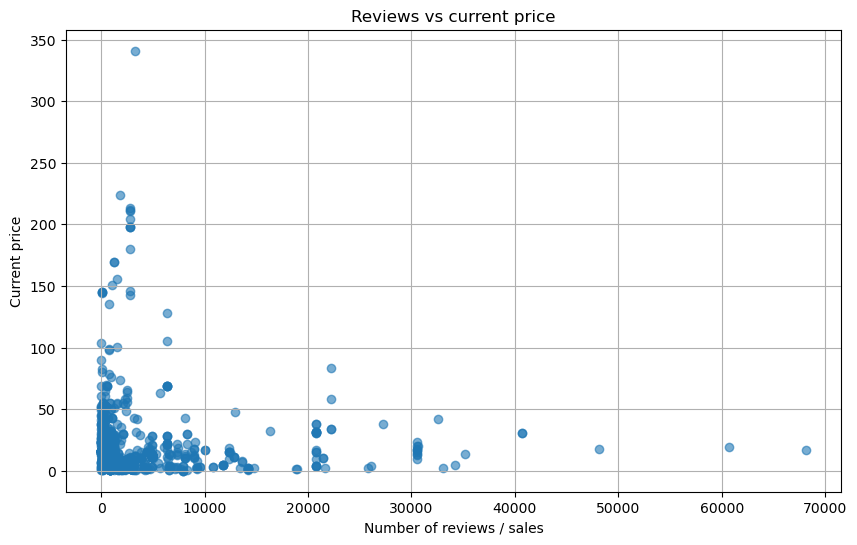

In [116]:
import matplotlib.pyplot as plt

# optional: ensure numeric
df["nbr_reviews_sales"] = pd.to_numeric(df["nbr_reviews_sales"], errors="coerce")
df["current_price"] = pd.to_numeric(df["current_price"], errors="coerce")

plt.figure(figsize=(10, 6))
plt.scatter(df["nbr_reviews_sales"], df["current_price"], alpha=0.6)
plt.xlabel("Number of reviews / sales")
plt.ylabel("Current price")
plt.title("Reviews vs current price")
plt.grid(True)
plt.show()


In [160]:
df.head(5)

,product_id,product_url,product_title,product_rating,nbr_reviews_sales,current_price,discount_percentage,old_price
0,4392351544,https://www.etsy.com/fr/listing/4392351544/sac...,"Sac cabas en velours côtelé personnalisé, sac ...",4.9,3900,10.68,45.0,19.42
1,1852832959,https://www.etsy.com/fr/listing/1852832959/sac...,"Sac fourre-tout en toile brodée, sac de plage ...",4.8,1300,6.95,60.0,17.37
2,4373938822,https://www.etsy.com/fr/listing/4373938822/sac...,Sac fourre-tout minimaliste personnalisé pour ...,5.0,83,10.42,50.0,20.83
3,4387299123,https://www.etsy.com/fr/listing/4387299123/sac...,Sac fourre-tout en coton matelassé : imprimé f...,4.8,168,17.56,25.0,23.42
4,4359920915,https://www.etsy.com/fr/listing/4359920915/sac...,Sac fourre-tout personnalisé en toile de jute|...,4.9,846,2.31,55.0,5.15


In [120]:
df["price_range"].describe()

count        935
unique         5
top       0–10 €
freq         347
Name: price_range, dtype: object

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           935 non-null    int64   
 1   product_url          935 non-null    object  
 2   product_title        935 non-null    object  
 3   product_rating       935 non-null    float64 
 4   nbr_reviews_sales    935 non-null    int64   
 5   current_price        935 non-null    float64 
 6   discount_percentage  935 non-null    float64 
 7   old_price            935 non-null    float64 
 8   price_range          935 non-null    category
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 59.7+ KB


==================================================================================================================================
# <div align="center">PLOTS</div>
==================================================================================================================================

### 📊 PLOT 03:

C:\Users\sboub\AppData\Local\Temp\ipykernel_26940\486634289.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_range = df.groupby("price_range")["nbr_reviews_sales"].sum().reindex(labels)


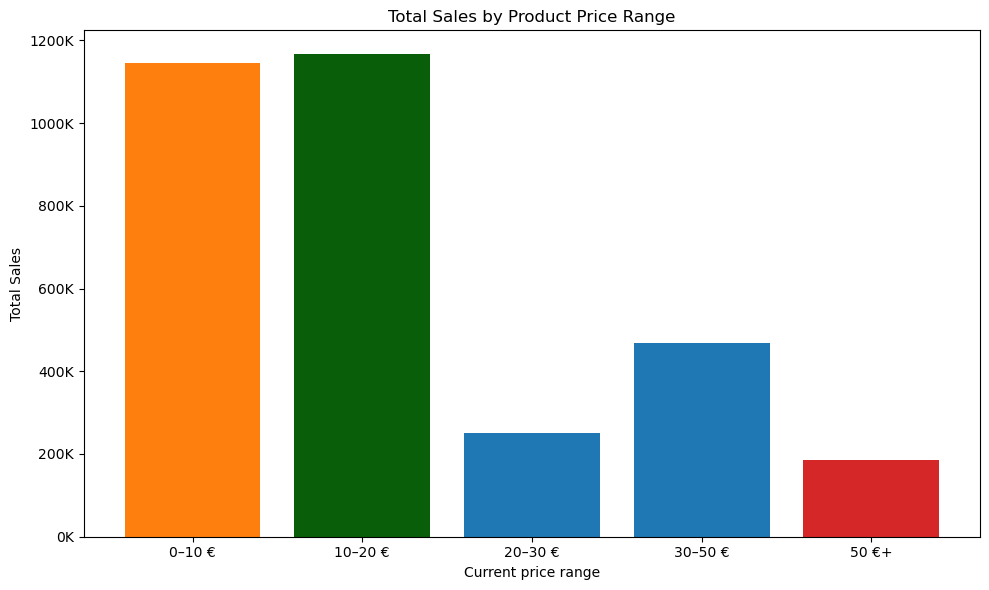

In [131]:
# PLOT 03
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ensure numeric
df["nbr_reviews_sales"] = pd.to_numeric(df["nbr_reviews_sales"], errors="coerce")
df["current_price"] = pd.to_numeric(df["current_price"], errors="coerce")
df = df.dropna(subset=["nbr_reviews_sales", "current_price"])

# intuitive price ranges
bins = [0, 10, 20, 30, 50, 1000]
labels = ["0–10 €", "10–20 €", "20–30 €", "30–50 €", "50 €+"]

df["price_range"] = pd.cut(
    df["current_price"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False
)

reviews_per_range = df.groupby("price_range")["nbr_reviews_sales"].sum().reindex(labels)

# base colors
colors = ["#1f77b4"] * len(reviews_per_range)

# get top 2 and lowest bars
top2 = reviews_per_range.sort_values(ascending=False).index[:2]
lowest = reviews_per_range.idxmin()

# assign colors
for label in reviews_per_range.index:
    if label == top2[0]:
        colors[reviews_per_range.index.get_loc(label)] = "#095F09"  # highest
    elif label == top2[1]:
        colors[reviews_per_range.index.get_loc(label)] = "#ff7f0e"  # second highest
    elif label == lowest:
        colors[reviews_per_range.index.get_loc(label)] = "#d62728"  # lowest = red

# plot
plt.figure(figsize=(10, 6))
bars = plt.bar(reviews_per_range.index, reviews_per_range.values, color=colors)

plt.xlabel("Current price range")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Price Range")

# Format Y-axis to show thousands (K)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 📊 PLOT 04:

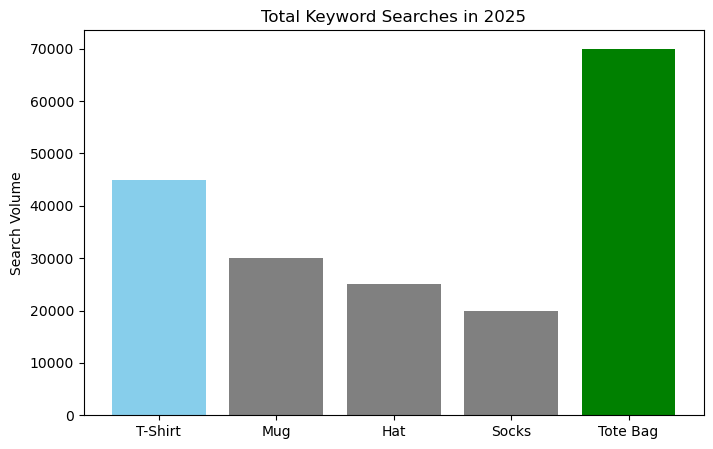

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Static data for total searches in 2025
data = {
    'Item': ['T-Shirt', 'Mug', 'Hat', 'Socks', 'Tote Bag'],
    'Total_Searches_2025': [45000, 30000, 25000, 20000, 70000]
}

# Create DataFrame and save CSV
df = pd.DataFrame(data)
df.to_csv('keyword_searches_2025.csv', index=False)

# Set colors
colors = ['skyblue' if item=='T-Shirt' else 'green' if item=='Tote Bag' else 'grey' for item in df['Item']]

# Plot
plt.figure(figsize=(8,5))
plt.bar(df['Item'], df['Total_Searches_2025'], color=colors)
plt.title('Total Keyword Searches in 2025')
plt.ylabel('Search Volume')
plt.show()


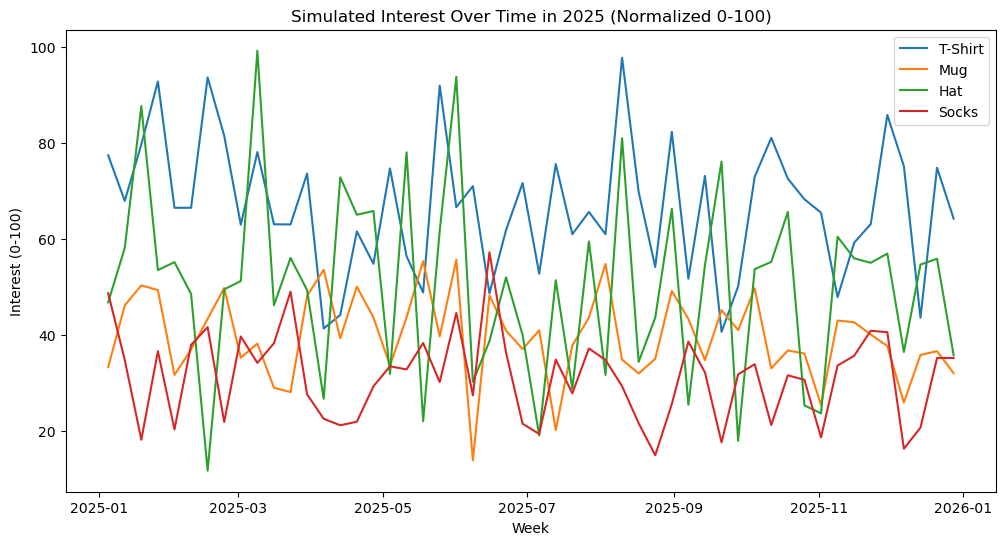

           Average     Median
T-Shirt  66.730377  66.487823
Mug      39.609430  39.460819
Hat      50.286354  52.742292
Socks    31.199173  32.453923


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword (normalized 0-100)
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)  # for reproducible simulation

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Plot interest over time
plt.figure(figsize=(12,6))
for keyword in ['T-Shirt', 'Mug', 'Hat', 'Socks']:
    plt.plot(df['Week'], df[keyword], label=keyword)

plt.title('Simulated Interest Over Time in 2025 (Normalized 0-100)')
plt.xlabel('Week')
plt.ylabel('Interest (0-100)')
plt.legend()
plt.show()

# Optional: Compute average & median per keyword
stats = pd.DataFrame({
    'Average': df[['T-Shirt','Mug','Hat','Socks']].mean(),
    'Median': df[['T-Shirt','Mug','Hat','Socks']].median()
})
print(stats)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword (normalized 0-100)
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)  # for reproducible simulation

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Plot interest over time
plt.figure(figsize=(12,6))
for keyword in ['T-Shirt', 'Mug', 'Hat', 'Socks']:
    plt.plot(df['Week'], df[keyword], label=keyword)

plt.title('Simulated Interest Over Time in 2025 (Normalized 0-100)')
plt.xlabel('Week')
plt.ylabel('Interest (0-100)')
plt.legend()
plt.show()

# Optional: Compute average & median per keyword
stats = pd.DataFrame({
    'Average': df[['T-Shirt','Mug','Hat','Socks']].mean(),
    'Median': df[['T-Shirt','Mug','Hat','Socks']].median()
})
print(stats)


### 📊 PLOT 05:

In [ ]:
# PLOT 5

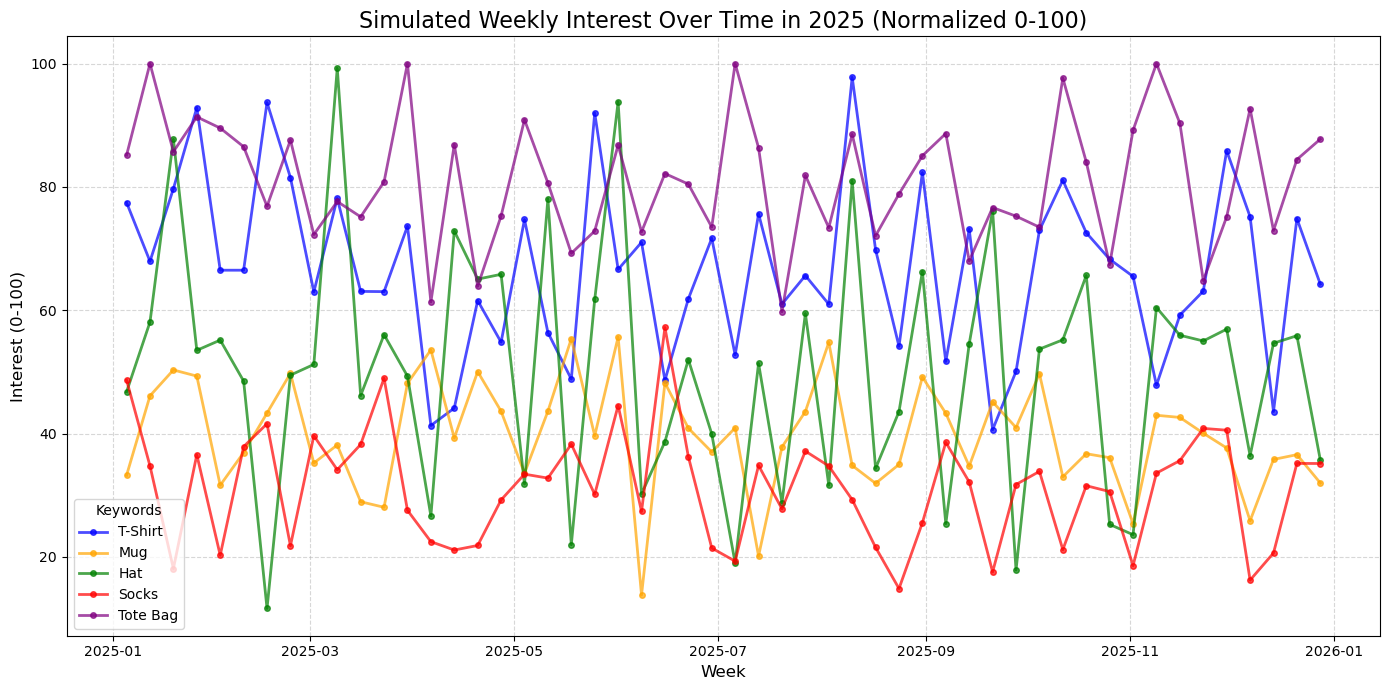

Average & Median Interest (2025, Worldwide):
            Average     Median
T-Shirt   66.730377  66.487823
Mug       39.609430  39.460819
Hat       50.286354  52.742292
Socks     31.199173  32.453923
Tote Bag  81.140753  81.341642


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword (normalized 0-100)
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)  # reproducible

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
    'Tote Bag': np.clip(np.random.normal(loc=80, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Plot interest over time
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'purple'}

for keyword in colors.keys():
    plt.plot(df['Week'], df[keyword], label=keyword, color=colors[keyword], marker='o', markersize=4, linewidth=2, alpha=0.7)

plt.title('Simulated Weekly Interest Over Time in 2025 (Normalized 0-100)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Interest (0-100)', fontsize=12)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})
print("Average & Median Interest (2025, Worldwide):")
print(stats)


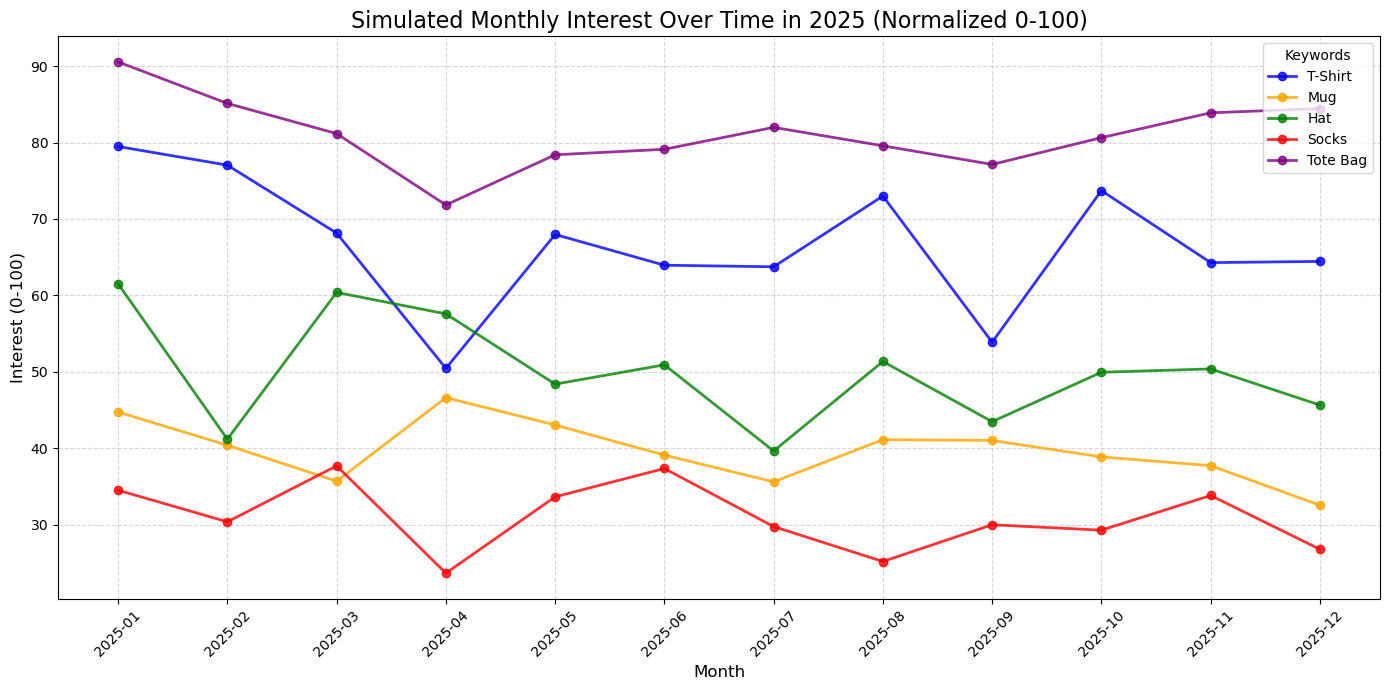

Average & Median Monthly Interest (2025, Worldwide):
            Average     Median
T-Shirt   66.678635  66.210903
Mug       39.709009  39.752814
Hat       50.038395  50.164293
Socks     31.006108  30.185314
Tote Bag  81.157415  80.907145


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
    'Tote Bag': np.clip(np.random.normal(loc=80, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Convert weekly data to monthly averages
df['Month'] = df['Week'].dt.to_period('M')
monthly_df = df.groupby('Month').mean().reset_index()

# Plot monthly interest
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'purple'}

for keyword in colors.keys():
    plt.plot(monthly_df['Month'].astype(str), monthly_df[keyword], label=keyword,
             color=colors[keyword], marker='o', markersize=6, linewidth=2, alpha=0.8)

plt.title('Simulated Monthly Interest Over Time in 2025 (Normalized 0-100)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Interest (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})
print("Average & Median Monthly Interest (2025, Worldwide):")
print(stats)


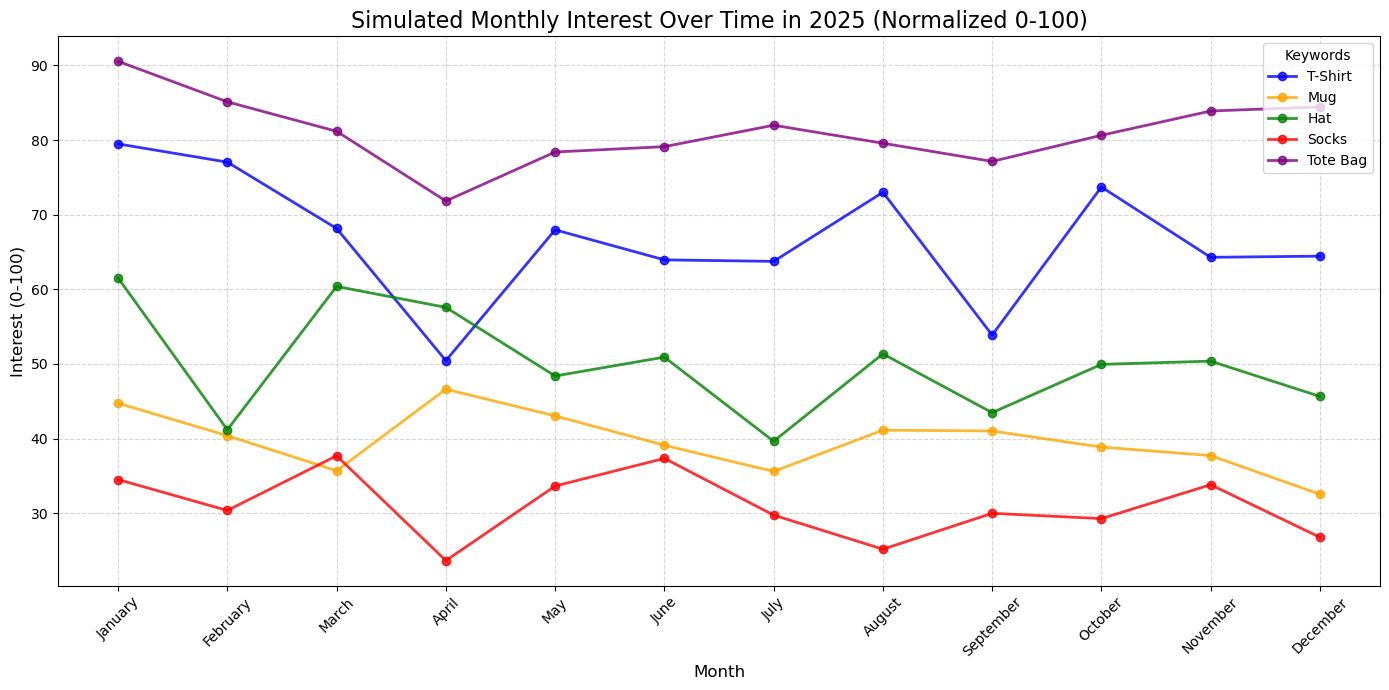

Average & Median Monthly Interest (2025, Worldwide):
            Average     Median
T-Shirt   66.678635  66.210903
Mug       39.709009  39.752814
Hat       50.038395  50.164293
Socks     31.006108  30.185314
Tote Bag  81.157415  80.907145


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate weekly interest over 2025 for each keyword
weeks = pd.date_range(start='2025-01-01', end='2025-12-31', freq='W')
np.random.seed(42)

data = {
    'Week': weeks,
    'T-Shirt': np.clip(np.random.normal(loc=70, scale=15, size=len(weeks)), 0, 100),
    'Mug': np.clip(np.random.normal(loc=40, scale=10, size=len(weeks)), 0, 100),
    'Hat': np.clip(np.random.normal(loc=50, scale=20, size=len(weeks)), 0, 100),
    'Socks': np.clip(np.random.normal(loc=30, scale=10, size=len(weeks)), 0, 100),
    'Tote Bag': np.clip(np.random.normal(loc=80, scale=10, size=len(weeks)), 0, 100),
}

df = pd.DataFrame(data)

# Convert weekly data to monthly averages
df['Month'] = df['Week'].dt.to_period('M')
monthly_df = df.groupby('Month').mean().reset_index()

# Convert month period to month name
monthly_df['Month'] = monthly_df['Month'].dt.strftime('%B')  # January, February, ...

# Plot monthly interest
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'purple'}

for keyword in colors.keys():
    plt.plot(monthly_df['Month'], monthly_df[keyword], label=keyword,
             color=colors[keyword], marker='o', markersize=6, linewidth=2, alpha=0.8)

plt.title('Simulated Monthly Interest Over Time in 2025 (Normalized 0-100)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Interest (0-100)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})
print("Average & Median Monthly Interest (2025, Worldwide):")
print(stats)


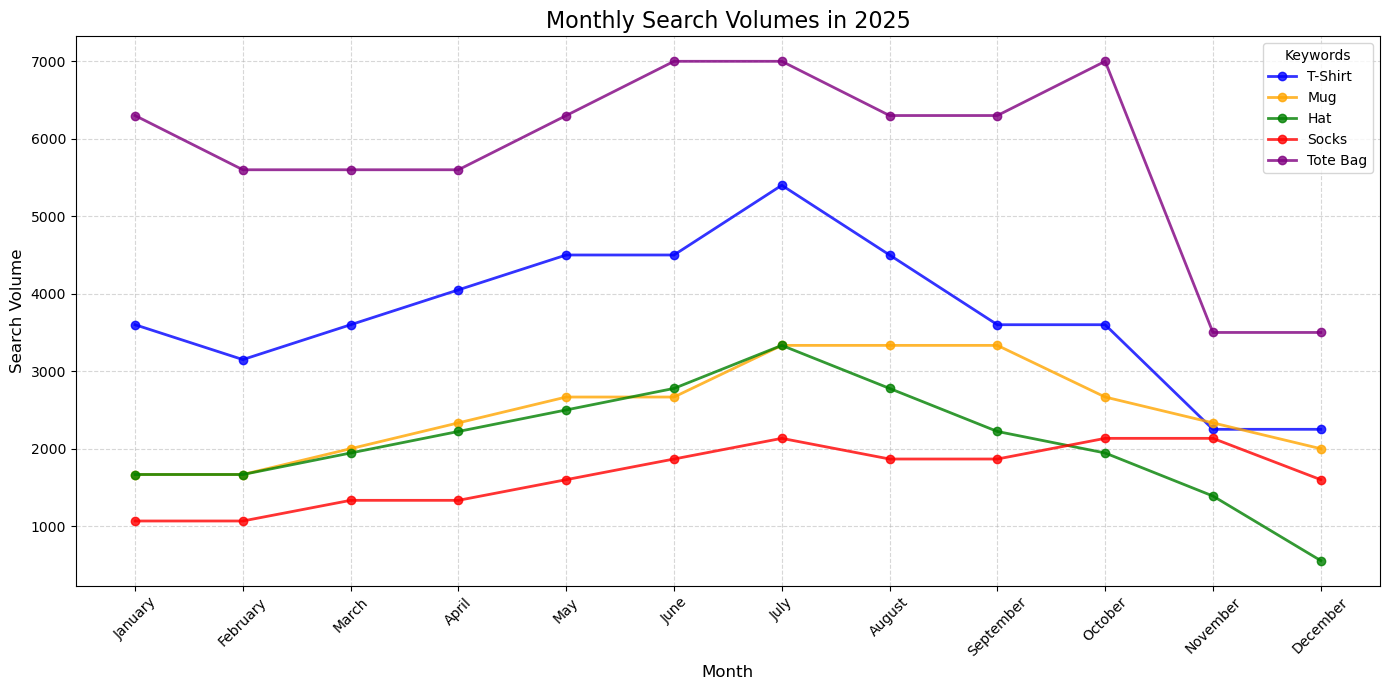

Average & Median Monthly Search Volume (2025, Worldwide):


,Average,Median
T-Shirt,3750.0,3600.0
Mug,2500.0,2500.0
Hat,2083.0,2083.0
Socks,1667.0,1733.0
Tote Bag,5833.0,6300.0


In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Total searches in 2025 for each keyword (from your data)
total_searches = {
    'T-Shirt': 45000,
    'Mug': 30000,
    'Hat': 25000,
    'Socks': 20000,
    'Tote Bag': 70000
}

# Simulate seasonal distribution over 12 months (percentages)
# These can be adjusted to simulate peaks in certain months
seasonal_distribution = {
    'T-Shirt': [8,7,8,9,10,10,12,10,8,8,5,5],
    'Mug': [5,5,6,7,8,8,10,10,10,8,7,6],
    'Hat': [6,6,7,8,9,10,12,10,8,7,5,2],
    'Socks': [4,4,5,5,6,7,8,7,7,8,8,6],
    'Tote Bag': [9,8,8,8,9,10,10,9,9,10,5,5]
}

# Generate monthly search numbers
months = pd.date_range(start='2025-01-01', periods=12, freq='MS').strftime('%B')
monthly_data = {'Month': months}

for keyword in total_searches:
    percentages = np.array(seasonal_distribution[keyword])
    monthly_data[keyword] = total_searches[keyword] * (percentages / percentages.sum())

monthly_df = pd.DataFrame(monthly_data)

# Plot monthly search volumes
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'purple'}

for keyword in colors.keys():
    plt.plot(monthly_df['Month'], monthly_df[keyword], label=keyword,
             color=colors[keyword], marker='o', markersize=6, linewidth=2, alpha=0.8)

plt.title('Monthly Search Volumes in 2025', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Search Volume', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})
print("Average & Median Monthly Search Volume (2025, Worldwide):")
stats.round()


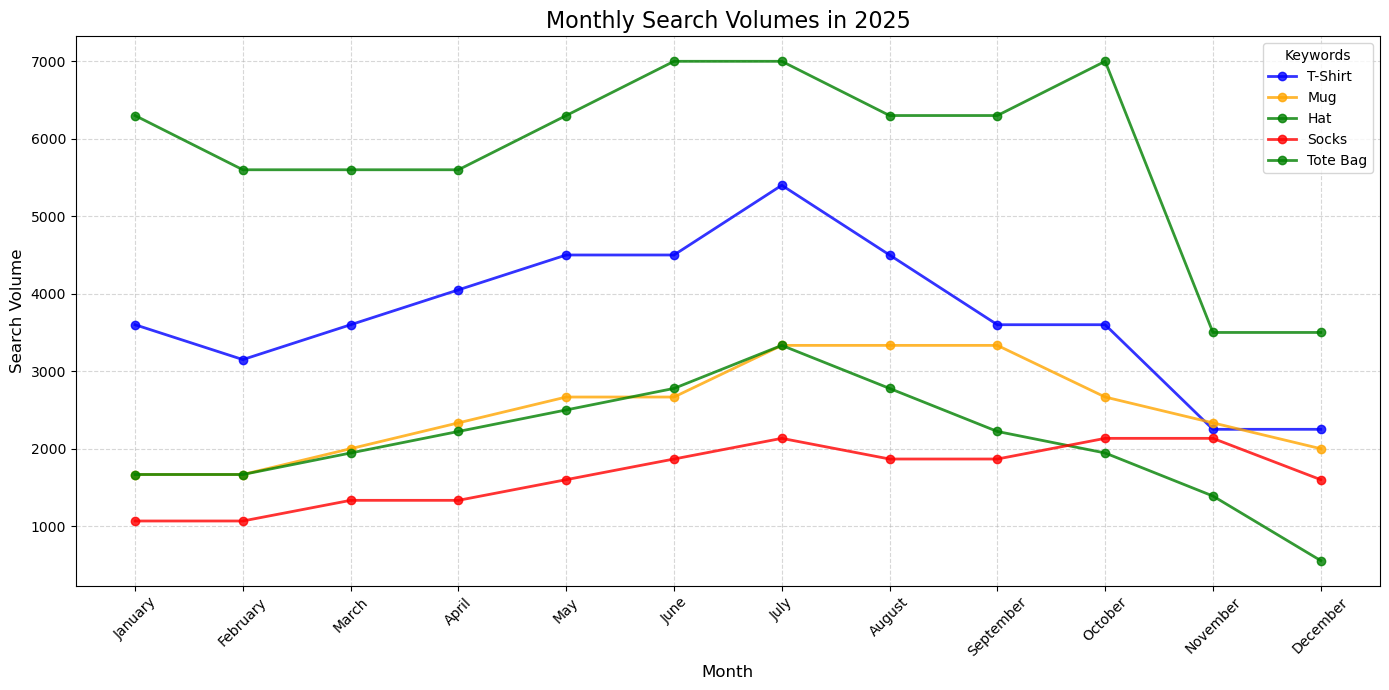

Average & Median Monthly Search Volume (2025, Worldwide):


,Average,Median
T-Shirt,3750.0,3600.0
Mug,2500.0,2500.0
Hat,2083.0,2083.0
Socks,1667.0,1733.0
Tote Bag,5833.0,6300.0


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Total searches in 2025 for each keyword (from your data)
total_searches = {
    'T-Shirt': 45000,
    'Mug': 30000,
    'Hat': 25000,
    'Socks': 20000,
    'Tote Bag': 70000
}

# Simulate seasonal distribution over 12 months (percentages)
seasonal_distribution = {
    'T-Shirt': [8,7,8,9,10,10,12,10,8,8,5,5],
    'Mug': [5,5,6,7,8,8,10,10,10,8,7,6],
    'Hat': [6,6,7,8,9,10,12,10,8,7,5,2],
    'Socks': [4,4,5,5,6,7,8,7,7,8,8,6],
    'Tote Bag': [9,8,8,8,9,10,10,9,9,10,5,5]
}

# Generate monthly search numbers
months = pd.date_range(start='2025-01-01', periods=12, freq='MS').strftime('%B')
monthly_data = {'Month': months}

for keyword in total_searches:
    percentages = np.array(seasonal_distribution[keyword])
    monthly_data[keyword] = total_searches[keyword] * (percentages / percentages.sum())

monthly_df = pd.DataFrame(monthly_data)

# Plot monthly search volumes
plt.figure(figsize=(14,7))
colors = {'T-Shirt':'blue', 'Mug':'orange', 'Hat':'green', 'Socks':'red', 'Tote Bag':'green'}

for keyword in colors.keys():
    plt.plot(monthly_df['Month'], monthly_df[keyword], label=keyword,
             color=colors[keyword], marker='o', markersize=6, linewidth=2, alpha=0.8)

plt.title('Monthly Search Volumes in 2025', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Search Volume', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Keywords')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compute average & median per keyword
stats = pd.DataFrame({
    'Average': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].mean(),
    'Median': monthly_df[['T-Shirt','Mug','Hat','Socks','Tote Bag']].median()
})

print("Average & Median Monthly Search Volume (2025, Worldwide):")
stats.round()


### 📊 PLOT 06: 

In [161]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords
import re

# Make sure you have French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Optional: add extra connectors/words you want to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Combine all product titles into one text
all_titles = ' '.join(df["product_title"].astype(str).tolist()).lower()

# Remove punctuation and numbers
all_titles_clean = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', all_titles)

# Split into words
words = all_titles_clean.split()

# Filter out stopwords
keywords = [word for word in words if word not in all_stopwords]

# Count frequency
word_counts = Counter(keywords)

# Get top 10 most common keywords
top_10_keywords = word_counts.most_common(10)

print(top_10_keywords)


[('sac', 1899), ('fourretout', 1142), ('cadeau', 512), ('personnalisé', 450), ('toile', 342), ('cabas', 248), ('coton', 187), ('demoiselle', 153), ('main', 152), ('sacs', 150)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
top_10_keywords

[('sac', 1899),
 ('fourretout', 1142),
 ('cadeau', 512),
 ('personnalisé', 450),
 ('toile', 342),
 ('cabas', 248),
 ('coton', 187),
 ('demoiselle', 153),
 ('main', 152),
 ('sacs', 150)]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            keyword  count
0               sac   2049
1        fourretout   1142
2            cadeau    512
3      personnalisé    490
4             toile    342
..              ...    ...
95        philippin     22
96  personnalisable     21
97         tendance     21
98            sport     20
99           unique     19

[100 rows x 2 columns]


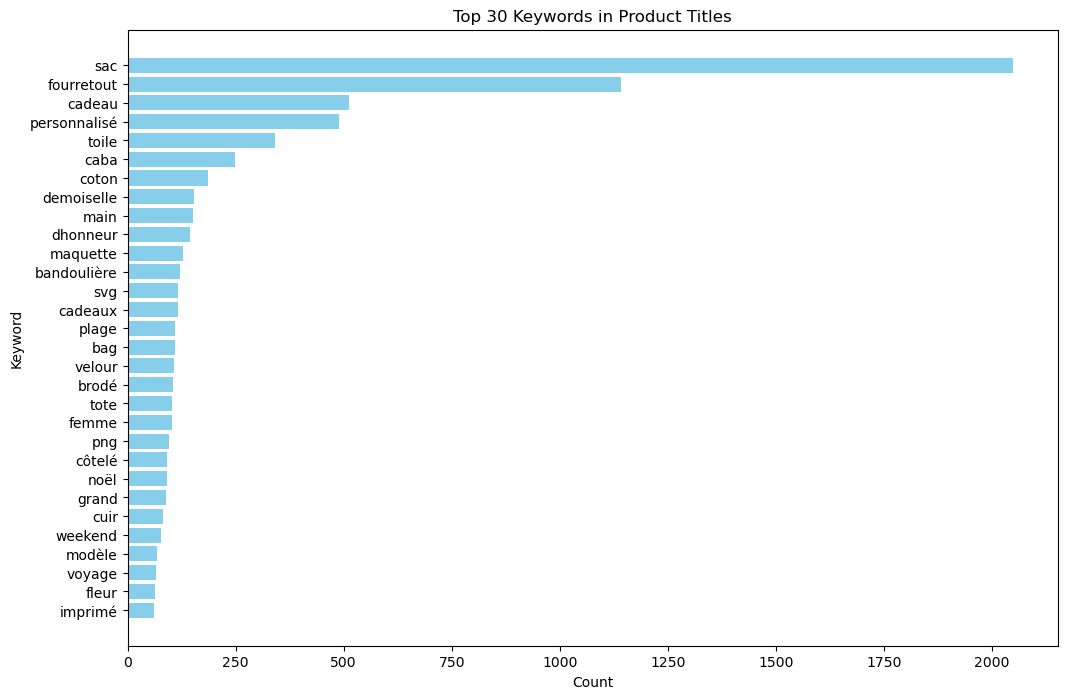

In [164]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Extra connectors/words to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Function to extract keywords and normalize plurals
def extract_keywords(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', text)  # remove punctuation/numbers
    words = text.split()
    keywords = []
    for word in words:
        if word not in all_stopwords and len(word) > 1:
            # Simple plural handling: remove trailing 's' if exists
            if word.endswith('s'):
                word = word[:-1]
            keywords.append(word)
    return keywords

# Apply the function to all product titles
all_keywords = []
df['product_title'].apply(lambda x: all_keywords.extend(extract_keywords(x)))

# Count frequency
word_counts = Counter(all_keywords)

# Top 100 keywords
top_100 = word_counts.most_common(100)
top_100_df = pd.DataFrame(top_100, columns=['keyword', 'count'])
print(top_100_df)

# Plot top 30 for readability
top_30 = top_100_df.head(30)
plt.figure(figsize=(12,8))
plt.barh(top_30['keyword'][::-1], top_30['count'][::-1], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top 30 Keywords in Product Titles')
plt.show()


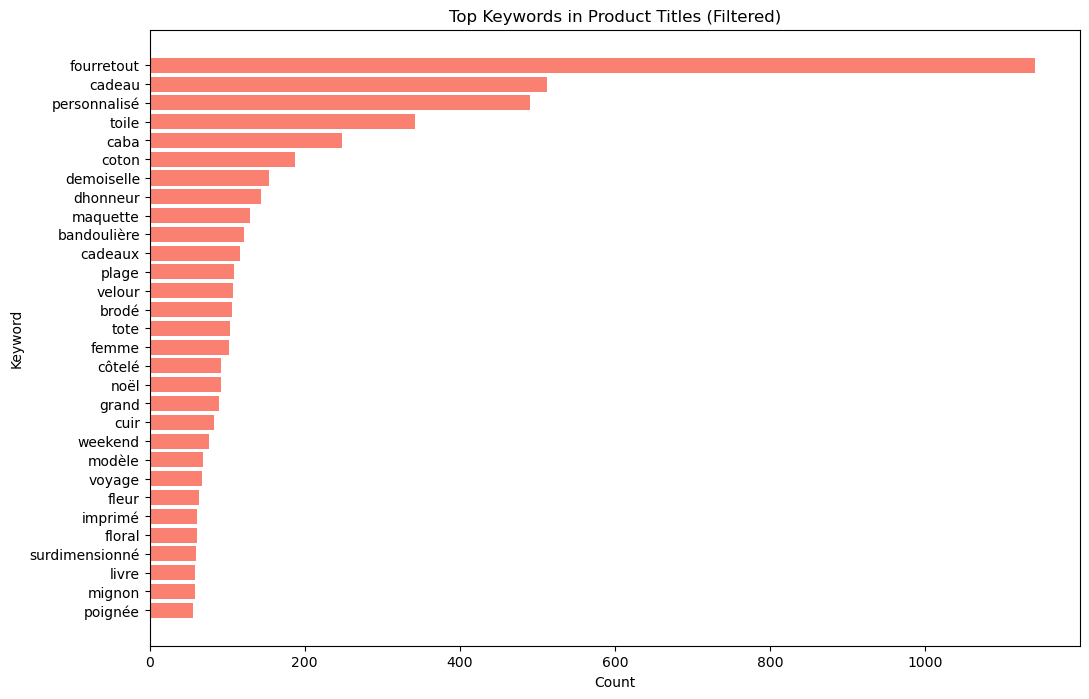

In [165]:
import matplotlib.pyplot as plt

# Words to exclude from the plot
exclude_words = {'sac', 'bag', 'png', 'svg', 'main'}

# Filter top_100_df
filtered_df = top_100_df[~top_100_df['keyword'].isin(exclude_words)]

# For readability, plot top 30 after filtering
top_filtered = filtered_df.head(30)

plt.figure(figsize=(12,8))
plt.barh(top_filtered['keyword'][::-1], top_filtered['count'][::-1], color='salmon')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.title('Top Keywords in Product Titles (Filtered)')
plt.show()


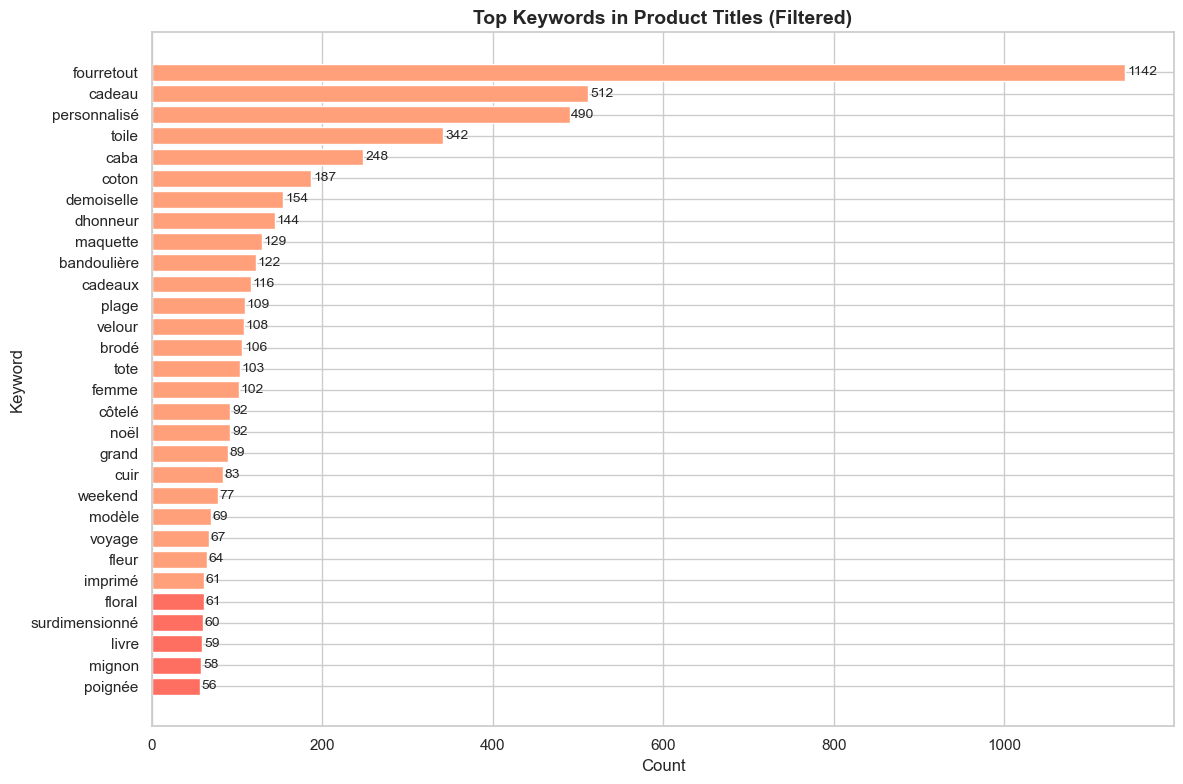

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Words to exclude from the plot
exclude_words = {'sac', 'bag', 'png', 'svg', 'main'}

# Filter out excluded words
filtered_df = top_100_df[~top_100_df['keyword'].isin(exclude_words)]

# Take top 30 keywords after filtering, sorted by count
top_filtered = filtered_df.sort_values(by='count', ascending=False).head(30)

# Highlight the top 5 keywords
colors = ['#FF6F61' if i < 5 else '#FFA07A' for i in range(len(top_filtered))]

# Create horizontal bar plot
plt.figure(figsize=(12,8))
bars = plt.barh(top_filtered['keyword'][::-1], top_filtered['count'][::-1], color=colors)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center', fontsize=10)

# Labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.title('Top Keywords in Product Titles (Filtered)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


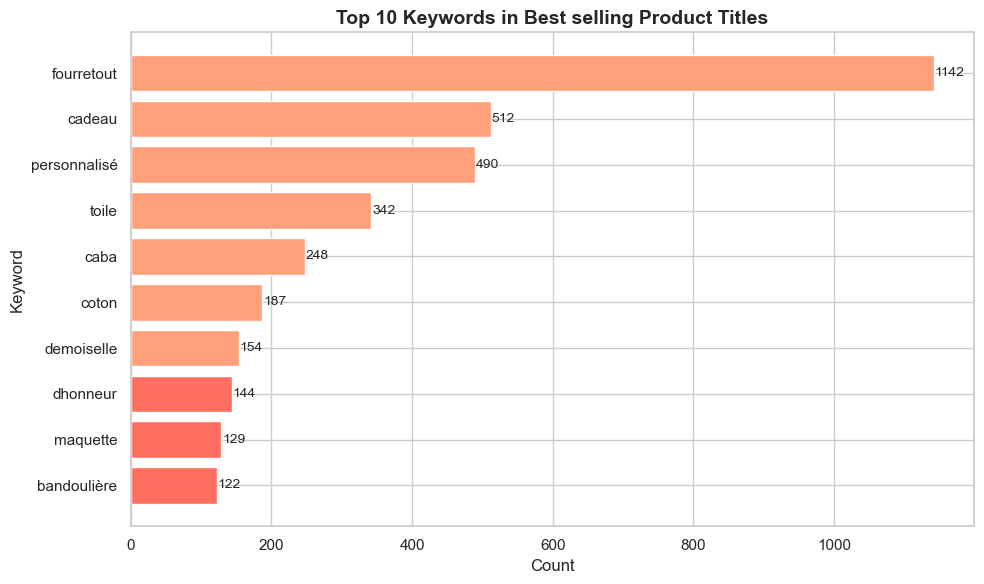

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Words to exclude from the plot
exclude_words = {'sac', 'bag', 'png', 'svg', 'main'}

# Filter out excluded words
filtered_df = top_100_df[~top_100_df['keyword'].isin(exclude_words)]

# Take top 10 keywords after filtering, sorted by count
top_filtered = filtered_df.sort_values(by='count', ascending=False).head(10)

# Highlight the top 3 keywords
colors = ['#FF6F61' if i < 3 else '#FFA07A' for i in range(len(top_filtered))]

# Create horizontal bar plot
plt.figure(figsize=(10,6))
bars = plt.barh(top_filtered['keyword'][::-1], top_filtered['count'][::-1], color=colors)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center', fontsize=10)

# Labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.title('Top 10 Keywords in Best selling Product Titles', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


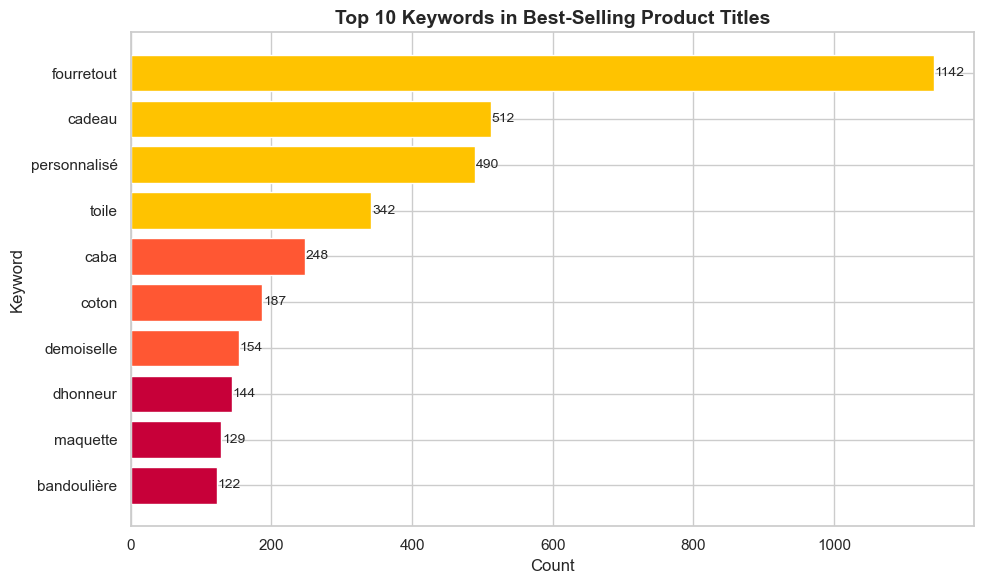

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Words to exclude from the plot
exclude_words = {'sac', 'bag', 'png', 'svg', 'main'}

# Filter out excluded words
filtered_df = top_100_df[~top_100_df['keyword'].isin(exclude_words)]

# Take top 10 keywords after filtering, sorted by count
top_filtered = filtered_df.sort_values(by='count', ascending=False).head(10)

# Assign colors based on rank (top 3: dark red, next 3: orange, rest: light salmon)
colors = []
for i in range(len(top_filtered)):
    if i < 3:
        colors.append('#C70039')  # Dark red
    elif i < 6:
        colors.append('#FF5733')  # Orange
    else:
        colors.append('#FFC300')  # Light yellow/orange

# Create horizontal bar plot
plt.figure(figsize=(10,6))
bars = plt.barh(top_filtered['keyword'][::-1], top_filtered['count'][::-1], color=colors)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center', fontsize=10)

# Labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.title('Top 10 Keywords in Best-Selling Product Titles', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


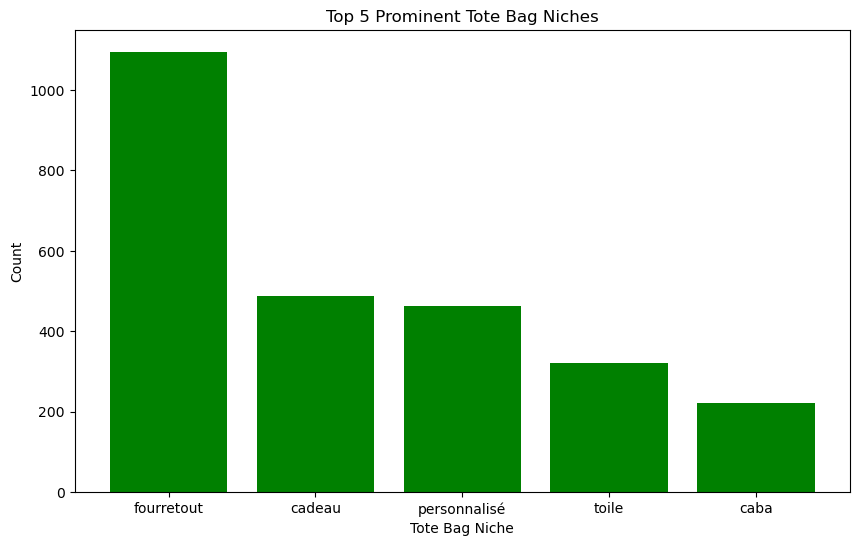

In [166]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Extra connectors/words to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Function to extract keywords from tote bag titles
def extract_tote_keywords(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', title)  # remove punctuation
    words = title.split()
    keywords = []
    # Only consider titles containing 'sac' or 'tote'
    if 'sac' in words or 'tote' in words:
        for word in words:
            if word not in all_stopwords and len(word) > 1 and word not in ['sac', 'tote']:
                if word.endswith('s'):  # simple plural handling
                    word = word[:-1]
                keywords.append(word)
    return keywords

# Collect all keywords from tote bag titles
all_tote_keywords = []
df['product_title'].apply(lambda x: all_tote_keywords.extend(extract_tote_keywords(x)))

# Count frequency
tote_counts = Counter(all_tote_keywords)

# Top 5 niches within tote bags
top_5_tote_niches = dict(tote_counts.most_common(5))

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_5_tote_niches.keys(), top_5_tote_niches.values(), color='green')
plt.xlabel('Tote Bag Niche')
plt.ylabel('Count')
plt.title('Top 5 Prominent Tote Bag Niches')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


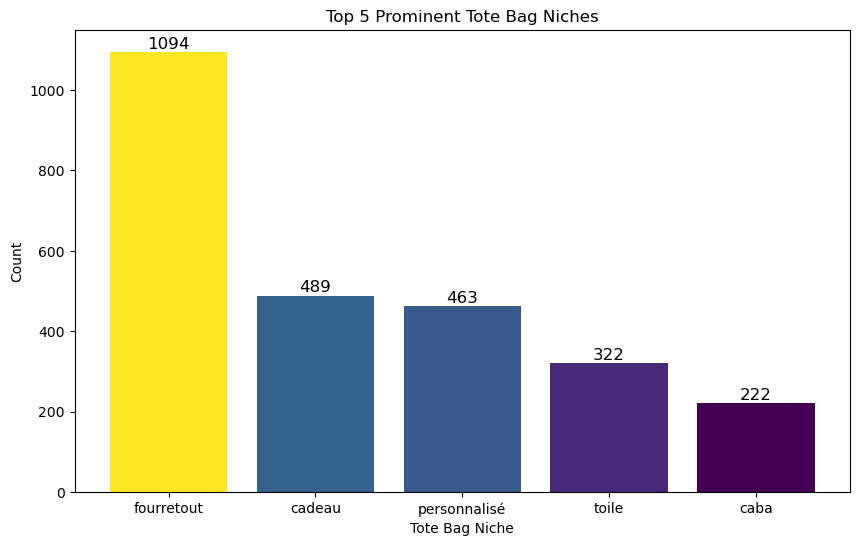

In [167]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import nltk
from nltk.corpus import stopwords

# Download French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Extra connectors/words to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Function to extract keywords from tote bag titles
def extract_tote_keywords(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', title)  # remove punctuation
    words = title.split()
    keywords = []
    if 'sac' in words or 'tote' in words:
        for word in words:
            if word not in all_stopwords and len(word) > 1 and word not in ['sac', 'tote']:
                if word.endswith('s'):
                    word = word[:-1]
                keywords.append(word)
    return keywords

# Collect all keywords from tote bag titles
all_tote_keywords = []
df['product_title'].apply(lambda x: all_tote_keywords.extend(extract_tote_keywords(x)))

# Count frequency
tote_counts = Counter(all_tote_keywords)

# Top 5 niches within tote bags
top_5_tote_niches = dict(tote_counts.most_common(5))

# Prepare colors based on counts (higher count → darker color)
values = list(top_5_tote_niches.values())
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
colors = plt.cm.viridis(norm(values))  # You can choose other colormaps like 'plasma' or 'coolwarm'

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_5_tote_niches.keys(), top_5_tote_niches.values(), color=colors)
plt.xlabel('Tote Bag Niche')
plt.ylabel('Count')
plt.title('Top 5 Prominent Tote Bag Niches')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=12)

plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sboub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


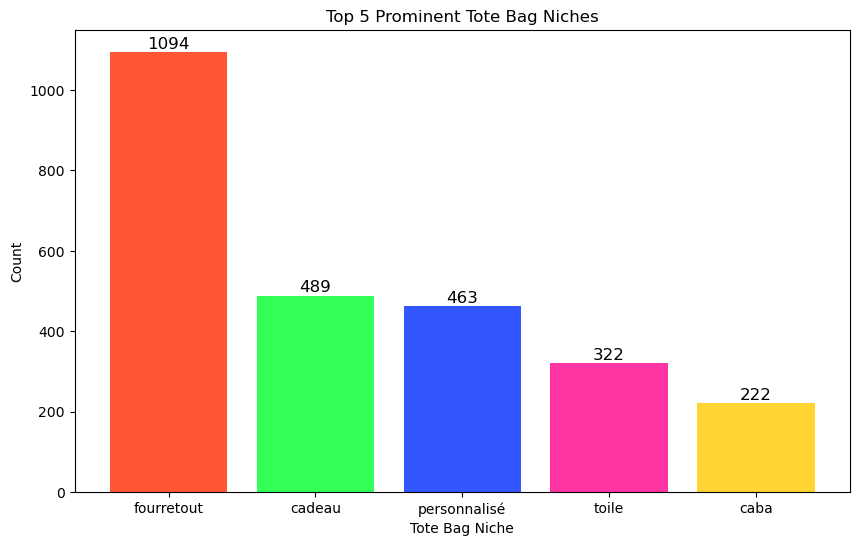

In [168]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download French stopwords
nltk.download('stopwords')
french_stopwords = set(stopwords.words('french'))

# Extra connectors/words to ignore
extra_stopwords = {'et', 'avec', 'pour', 'ou', 'les', 'des', 'la', 'le', 'un', 'une', 'du', 'au'}
all_stopwords = french_stopwords.union(extra_stopwords)

# Function to extract keywords from tote bag titles
def extract_tote_keywords(title):
    title = str(title).lower()
    title = re.sub(r'[^a-zàâçéèêëîïôûùüÿñæœ\s]', '', title)
    words = title.split()
    keywords = []
    if 'sac' in words or 'tote' in words:
        for word in words:
            if word not in all_stopwords and len(word) > 1 and word not in ['sac', 'tote']:
                if word.endswith('s'):
                    word = word[:-1]
                keywords.append(word)
    return keywords

# Collect all keywords from tote bag titles
all_tote_keywords = []
df['product_title'].apply(lambda x: all_tote_keywords.extend(extract_tote_keywords(x)))

# Count frequency
tote_counts = Counter(all_tote_keywords)

# Top 5 niches within tote bags
top_5_tote_niches = dict(tote_counts.most_common(5))

# Define highly distinct colors for 5 bars
distinct_colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFD433']  # Red, Green, Blue, Pink, Yellow

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(top_5_tote_niches.keys(), top_5_tote_niches.values(), color=distinct_colors)
plt.xlabel('Tote Bag Niche')
plt.ylabel('Count')
plt.title('Top 5 Prominent Tote Bag Niches')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', va='bottom', fontsize=12)

plt.show()


### 📊 PLOT 01: GOOGLE TRENDS TOTE BAG YEAR 2025

In [109]:
!pip install pytrends


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


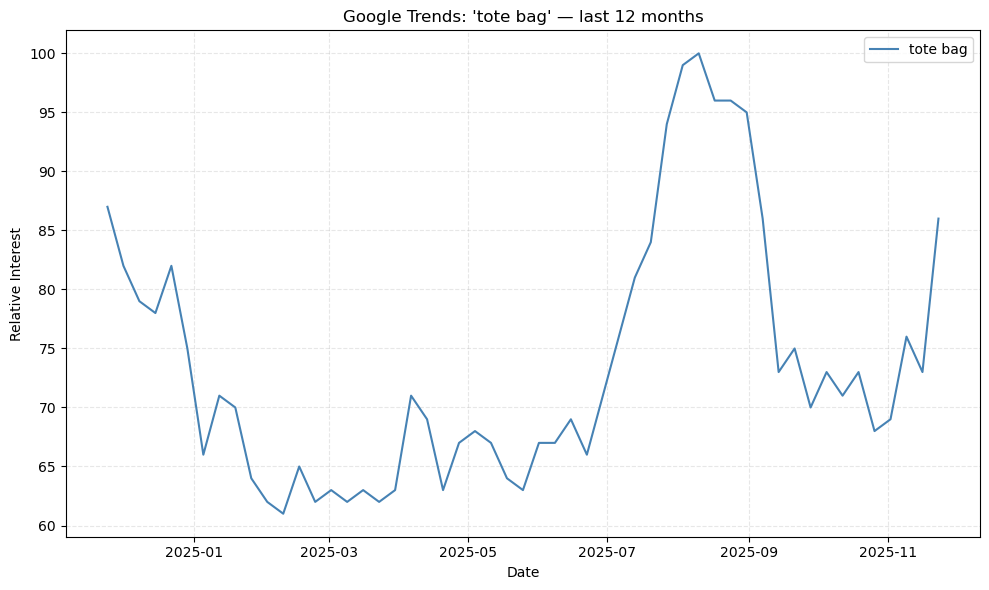

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_google_trends(keyword, timeframe='today 12-m', geo=''):
    """
    Fetch Google Trends 'interest over time' data using the unofficial JSON API.
    :param keyword: string, search term
    :param timeframe: string, e.g. 'today 12-m' for last 12 months
    :param geo: string, country code, '' for worldwide
    :return: pandas DataFrame with date and interest
    """
    url = 'https://trends.google.com/trends/api/widgetdata/multiline/csv'
    session = requests.Session()
    
    # Step 1: get token
    explore_url = 'https://trends.google.com/trends/explore'
    params = {
        'q': keyword,
        'date': timeframe,
        'geo': geo,
        'hl': 'en-US',
    }
    r = session.get(explore_url, params=params)
    
    # Step 2: build payload (simplified)
    pytrends_payload = {
        'comparisonItem': [{'keyword': keyword, 'geo': geo, 'time': timeframe}],
        'category': 0,
        'property': ''
    }
    
    # Step 3: Use pytrends library if installed, or fallback to requests
    try:
        from pytrends.request import TrendReq
        pytrend = TrendReq(hl='en-US', tz=360)
        pytrend.build_payload([keyword], timeframe=timeframe, geo=geo)
        df = pytrend.interest_over_time()
        if 'isPartial' in df.columns:
            df = df.drop(columns=['isPartial'])
        return df
    except ImportError:
        print("Pytrends not installed. Using CSV download from Trends (may be limited).")
        print("For full functionality, install pytrends: pip install pytrends")
        return None

def plot_trend(df, keyword):
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df[keyword], label=keyword, color='steelblue')
    plt.title(f"Google Trends: '{keyword}' — last 12 months")
    plt.xlabel('Date')
    plt.ylabel('Relative Interest')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    keyword = "tote bag"
    df = fetch_google_trends(keyword)
    if df is not None:
        plot_trend(df, keyword)


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


            tote bag  isPartial
date                           
2024-12-29        75      False
2025-01-05        66      False
2025-01-12        71      False
2025-01-19        70      False
2025-01-26        64      False
            tote bag  isPartial
date                           
2025-10-26        68      False
2025-11-02        69      False
2025-11-09        76      False
2025-11-16        73      False
2025-11-23        86       True


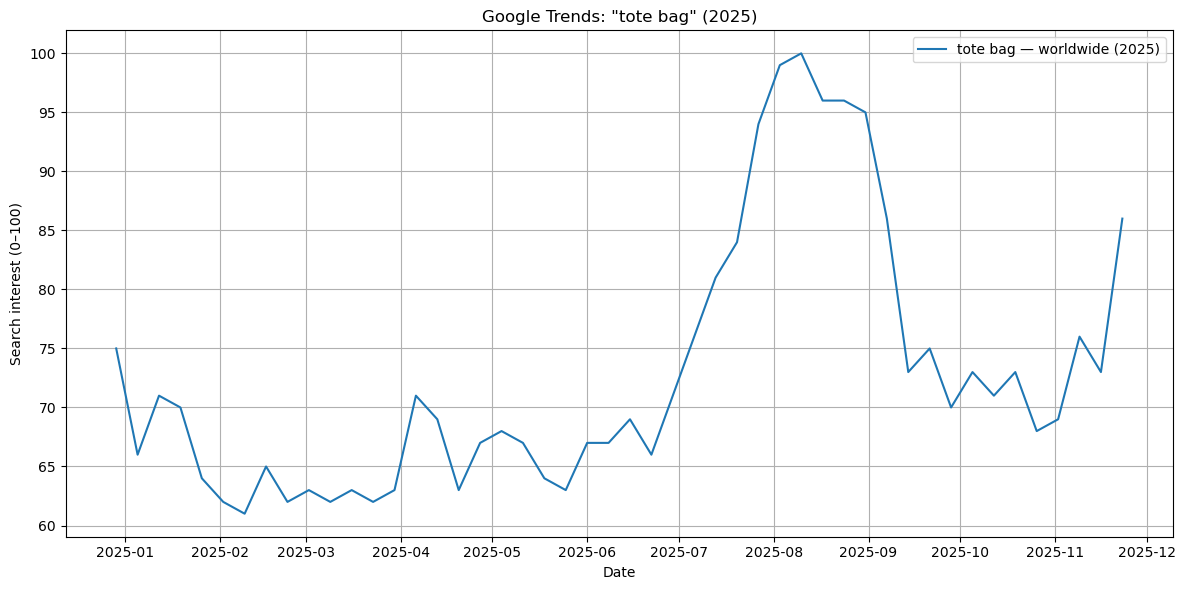

In [ ]:
# Install the library first, if you haven't
# pip install pytrends pandas matplotlib

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# 1. connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. set your keyword(s) and timeframe (here: 2025)
kw = ["tote bag"]
pytrends.build_payload(kw_list=kw,
                       timeframe="2025-01-01 2025-12-31",
                       geo="",     # empty = Worldwide
                       gprop="")   # web search

# 3. fetch interest over time
df = pytrends.interest_over_time()

print(df.head())
print(df.tail())

# 4. plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df["tote bag"], label="tote bag — worldwide (2025)")
plt.xlabel("Date")
plt.ylabel("Search interest (0–100)")
plt.title('Google Trends: "tote bag" (2025)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Install the libraries first:
# pip install pytrends pandas plotly

from pytrends.request import TrendReq
import pandas as pd
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set your keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()  # make date a column

# 4. Aggregate monthly (mean for each month)
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()  # convert back to timestamp for Plotly

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})
fig.update_traces(marker=dict(size=10, color='red'), line=dict(color='blue'))
fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# Force y-axis to start at 0
fig.update_yaxes(range=[0, monthly_df['tote bag'].max() + 10])  # add a bit of space on top
fig.update_traces(marker=dict(size=10, color='green'), line=dict(color='green'))
fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:

import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors and layout
fig.update_traces(marker=dict(size=10, color='#c7ed2e'), line=dict(color='#c7ed2e', width=3))
fig.update_layout(
    plot_bgcolor='white',  # white background
    paper_bgcolor='white', # white surrounding
    xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20))
)

fig.show()
fig.write_html("tote_bag_trends.html", include_plotlyjs='cdn', full_html=True)



c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
# PLOT 1
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors, line thickness, and layout
fig.update_traces(marker=dict(size=10, color='#c7ed2e'),
                  line=dict(color='#c7ed2e', width=6))  # thicker line

fig.update_layout(
    plot_bgcolor='white',      # white plot background
    paper_bgcolor='white',     # white surrounding
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False,
               range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)  # remove extra padding to make it clean
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



---

### 📊 PLOT 02: GOOGLE TRENDS 5 PAST YEARS TOTE BAG

In [ ]:
# PLOT 2
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (Past 5 Years)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors, line thickness, and layout (black line and dots)
fig.update_traces(marker=dict(size=10, color='black'),
                  line=dict(color='black', width=6))

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False,
               range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Extract month
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# 5. Order months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# 6. Create boxplot per month
fig = px.box(df, x='month', y='tote bag', points='all',  # 'all' shows all data points
             hover_data=['year', 'date'],
             title='Google Trends: "tote bag" (Past 5 Years by Month)')

# 7. Customize colors and layout
fig.update_traces(marker=dict(color='black', size=8, opacity=0.7),
                  line=dict(color='black', width=2))

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Silence FutureWarnings

import pandas as pd
from pytrends.request import TrendReq
import plotly.graph_objects as go

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Extract month and year
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# 5. Order months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# 6. Compute monthly average across years
monthly_avg = df.groupby('month', observed=False)['tote bag'].mean().reset_index()

# 7. Create scatter + line plot
fig = go.Figure()

# Add all data points as black dots
fig.add_trace(go.Scatter(
    x=df['month'],
    y=df['tote bag'],
    mode='markers',
    marker=dict(color='black', size=8, opacity=0.7),
    name='Data Points',
    hovertext=df['year'].astype(str) + ' - ' + df['date'].dt.strftime('%Y-%m-%d')
))

# Add black line for monthly average
fig.add_trace(go.Scatter(
    x=monthly_avg['month'],
    y=monthly_avg['tote bag'],
    mode='lines+markers',
    line=dict(color='black', width=3),
    marker=dict(size=10),
    name='Monthly Average'
))

# 8. Layout customization
fig.update_layout(
    title=dict(text='Google Trends: "tote bag" (Past 5 Years by Month)', font=dict(size=20)),
    xaxis_title='Month',
    yaxis_title='Search Interest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


---

==================================================================================================================================
# <div align="center">INSIGHTS</div>
==================================================================================================================================

### 🧠 INSIGHT 01:
Text

----

### 🧠 INSIGHT 02:
Text

---

### 🧠 INSIGHT 03:
Text


==================================================================================================================================